In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import re
import seaborn as sns 
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns
from datetime import datetime
from eda_module import *
%load_ext autoreload
%autoreload 2

#Shorten video link 
# def transform_short_link(long_link: str) -> str:
#     patterns = {
#         0: [r"(www\.youtube\.com)", "youtu.be"],
#         1: [r"watch\?v=([a-zA-Zz0-9_-]{11})", r"\1"],
#         2: [r"&t=(\d+)s", r"?t=\1s"],
#     }
    
#     new_link = long_link
    
#     for i in range(3):
#         new_link = re.sub(patterns[i][0], patterns[i][1], new_link)
        
#     return new_link

# def transform_malformed_datetime(dt: str) -> str:
#     if type(dt) is not str:
#         return dt
    
#     pattern = r"^(.+)-(.+)-(.+)$"
#     match = re.search(pattern, dt)
#     if not match:
#         return dt
    
#     groups = match.groups()
#     return "/".join([groups[1], groups[0], groups[2]])

df = pd.read_csv('./youtube_cleaned.csv', encoding='latin')
#df['Video Link'] = df['Video Link'].apply(transform_short_link)
# df['Date of Video Upload'] = df['Date of Video Upload'].apply(transform_malformed_datetime)
# df['Date of the Last Comment'] = df['Date of the Last Comment'].apply(transform_malformed_datetime)
df.head(5)

,video_link,vid_view,video_title,channel_url,creator_name,creator_gender,total_channel_subscriber,total_channel_views,duration_of_video,duration_in_seconds,...,maximum_quality_of_the_video,no_of_videos_the_channel,no_of_playlist,premiered_or_not,com_en_per_week,duration_in_minutes,upload_year,upload_month,upload_weekday,length_catagories
0,https://youtu.be/_0fUOJ55gis,146059,samse - didupe off-road royal enfield himalayan,https://www.youtube.com/c/sriharick,srihari ck,Male,40200,7964284,00:30:41,1841,...,1080p,462,12,No,1,31,2022,July,Friday,Long
1,https://youtu.be/_70MSLPRfZI,231969,bhoom baddhal web series,https://www.youtube.com/c/ChaibisketTelugu,Chai Bisket,Male,920000,137535681,00:14:24,864,...,1080p,251,12,Yes,2,14,2022,May,Sunday,Medium
2,https://youtu.be/_8gfCdt3H00?t=87s,878,"customer psychology, four views of consumer de...",https://www.youtube.com/channel/UCcIUnCsBfONvb...,Virda Warsi,Female,458,72945,00:08:12,492,...,720p,158,0,No,0,8,2021,February,Tuesday,Short
3,https://youtu.be/_CkFNJgKsFs,9965,top countries with proven natural gas reserves,https://www.youtube.com/c/trtworld,TRT,Company,1680000,541653219,00:01:06,66,...,1080p,46509,48,No,20,1,2022,September,Tuesday,Supershort
4,https://youtu.be/_GFkHA5EZdE,39780561,73 questions with selena gomez,Vogue - YouTube,Vogue,Company,12100000,3600496171,00:07:40,460,...,1080p,2872,113,No,1,8,2017,March,Tuesday,Short


In [2]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

# Data Wrangling 

Our dataset is accidentally detected with some of missing value and some outlier. And also its value inside are not clean making us not easier to understand so due to of these reasons, we have to use some of method plus some of built-in function of python to process dealing with this. 

Objective to Change : 

1. Shorten Video Link 
2. Rename some of incorrected column name 
3. Convert dtype for each column value 
4. Markout value to replace outlier 
5. Replace nan value by another name in creator_gender

In [3]:
df["video_link"]

0            https://youtu.be/_0fUOJ55gis
1            https://youtu.be/_70MSLPRfZI
2      https://youtu.be/_8gfCdt3H00?t=87s
3            https://youtu.be/_CkFNJgKsFs
4            https://youtu.be/_GFkHA5EZdE
                      ...                
868          https://youtu.be/GS18WawA-t0
869          https://youtu.be/_tc_APkjH2Q
870          https://youtu.be/Xfj4osSYfhU
871          https://youtu.be/mGEHqwVz0eI
872          https://youtu.be/UGATpt0I4vA
Name: video_link, Length: 873, dtype: object

In [4]:
#Detect null value 
df['video_link'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
868    False
869    False
870    False
871    False
872    False
Name: video_link, Length: 873, dtype: bool

In [5]:
df['creator_name'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
868    False
869    False
870    False
871    False
872    False
Name: creator_name, Length: 873, dtype: bool

In [6]:
#Find number of like by gender 
df.groupby('creator_name')['no_of_likes'].sum()

creator_name
100 Years Of Health       196000
2 Brother Vlogs             2400
365 Data Science           13000
5-Minutes DÃ©cor          680000
A Girl From Uk02               0
                          ...   
newslanudry                  670
srihari ck                  6700
touropia                   98000
your story tv                224
Â Anubhav Singh Bassi    2400000
Name: no_of_likes, Length: 606, dtype: int64

In [7]:
#Removing null value to avoid error
#df.dropna(inplace = True)

In [8]:
df.isna().sum()

video_link                      0
vid_view                        0
video_title                     0
channel_url                     0
creator_name                    0
creator_gender                  0
total_channel_subscriber        0
total_channel_views             0
duration_of_video               0
duration_in_seconds             0
date_of_video_upload            0
no_of_likes                     0
language_of_the_video           0
subtitle                        0
video_description               0
hashtags                        0
no_of_comments                  0
date_of_the_last_comment        0
maximum_quality_of_the_video    0
no_of_videos_the_channel        0
no_of_playlist                  0
premiered_or_not                0
com_en_per_week                 0
duration_in_minutes             0
upload_year                     0
upload_month                    0
upload_weekday                  0
length_catagories               0
dtype: int64

In [9]:
#Rename Column 
df.rename(columns = {"total_chanel_views" : "total_channel_views"}, inplace = True )

In [10]:
df.columns

Index(['video_link', 'vid_view', 'video_title', 'channel_url', 'creator_name',
       'creator_gender', 'total_channel_subscriber', 'total_channel_views',
       'duration_of_video', 'duration_in_seconds', 'date_of_video_upload',
       'no_of_likes', 'language_of_the_video', 'subtitle', 'video_description',
       'hashtags', 'no_of_comments', 'date_of_the_last_comment',
       'maximum_quality_of_the_video', 'no_of_videos_the_channel',
       'no_of_playlist', 'premiered_or_not', 'com_en_per_week',
       'duration_in_minutes', 'upload_year', 'upload_month', 'upload_weekday',
       'length_catagories'],
      dtype='object')

<Axes: >

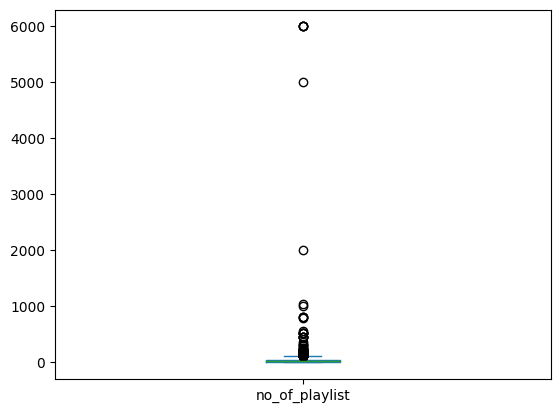

In [11]:
#Plot graph to detect outlier 
df['no_of_playlist'].plot(kind = 'box')

<Axes: >

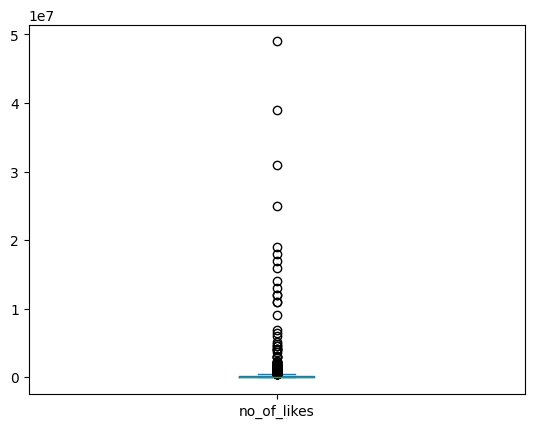

In [12]:
df['no_of_likes'].plot(kind = 'box')

In [13]:
#There are a bunch of outliers 

In [14]:
#Replacing with Median values as there are so many outliers
df['no_of_likes'].fillna(int(df['no_of_likes'].median()),inplace = True)
df['no_of_playlist'].fillna(int(df['no_of_playlist'].median()),inplace = True)

<Axes: >

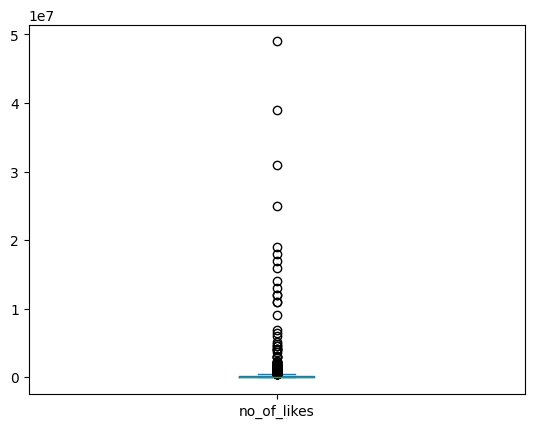

In [15]:
df['no_of_likes'].plot(kind = 'box')
#df['No of Playlist'].plot(kind = 'box')

<Axes: >

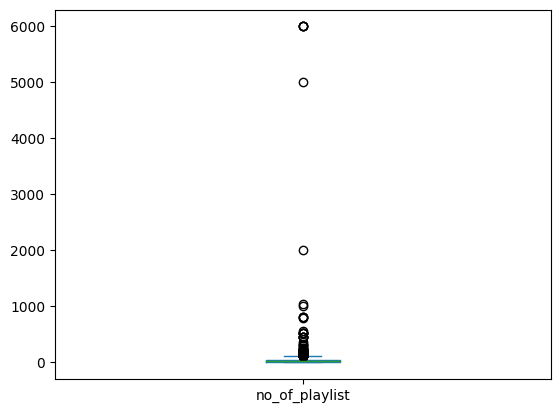

In [16]:
df['no_of_playlist'].plot(kind = 'box')

In [17]:
df.describe()

,vid_view,total_channel_subscriber,total_channel_views,duration_in_seconds,no_of_likes,hashtags,no_of_comments,no_of_videos_the_channel,no_of_playlist,com_en_per_week,duration_in_minutes,upload_year
count,8.730000e+02,8.730000e+02,8.730000e+02,873.000000,8.730000e+02,873.000000,8.730000e+02,873.000000,873.000000,873.000000,873.000000,873.000000
mean,5.522344e+07,1.054350e+07,2.277615e+09,1981.635739,5.918221e+05,1.032073,4.668007e+04,5031.641466,83.112257,4.293242,33.026346,2020.467354
std,4.070861e+08,2.432832e+07,1.068136e+10,6505.424745,3.006789e+06,1.844003,4.873033e+05,24524.366331,451.517925,16.739125,108.429142,2.479114
min,2.300000e+01,3.400000e+01,3.600000e+01,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,2005.000000
25%,1.943890e+05,3.410000e+05,3.658320e+07,327.000000,5.200000e+03,0.000000,2.220000e+02,156.000000,7.000000,0.000000,5.000000,2020.000000
50%,1.250286e+06,2.190000e+06,2.606329e+08,655.000000,3.200000e+04,0.000000,1.203000e+03,400.000000,16.000000,1.000000,11.000000,2022.000000
75%,9.002909e+06,9.440000e+06,1.267778e+09,1047.000000,1.860000e+05,1.000000,7.016000e+03,1400.000000,48.000000,3.000000,17.000000,2022.000000
max,7.990990e+09,3.052000e+08,2.020000e+11,62700.000000,4.900000e+07,28.000000,1.124480e+07,420000.000000,6000.000000,341.000000,1045.000000,2022.000000


In [18]:
#the gender coloum is very likely having many missing values 
print(df['creator_gender'].value_counts())

creator_gender
Male       482
Company    313
Female      78
Name: count, dtype: int64


<Axes: ylabel='count'>

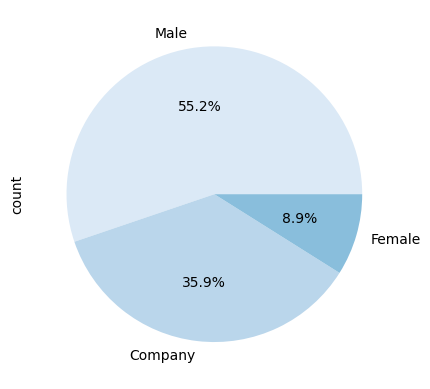

In [19]:
colors = sns.color_palette('Blues')[0:4]
#explode = [0, 0.1, 0,0]
df['creator_gender'].value_counts(dropna = False).plot(kind = 'pie',autopct='%1.1f%%', colors= colors)

In [20]:
#The pie graph indicate that missing value (nan) are 34.7% which would be hugely affected to the data accuracy 

In [21]:
#Selected only main name of the company valuse name
df[df['creator_gender'] == 'Company']['creator_name'].unique()[:25]

array(['TRT', 'Vogue', 'PUBG: BATTLEGROUNDS', 'Wildgamersk',
       'Codename RedDragon', 'Prime', '100 Years Of Health', 'CNET',
       'Videotragic', 'PokÃ©mon Asia Officia', 'Other LevelÂ\x92S',
       'Disney', 'touropia', 'GP Culture', 'IGN', 'Branch Education',
       'Simplilearn', 'Medcircle', 'DJI', 'WIRED', 'Motivation Mentors',
       'CNBC Make I', 'Official Triumph Motorcycles',
       'Car Crash - Driving Fail', 'ABB Formula E'], dtype=object)

In [22]:
df[df["creator_gender"].isnull()]['creator_name'].unique()[25:]

array([], dtype=object)

In [23]:
df.loc[df['creator_gender'].isnull(), 'creator_gender' ] = 'Company'

<Axes: ylabel='count'>

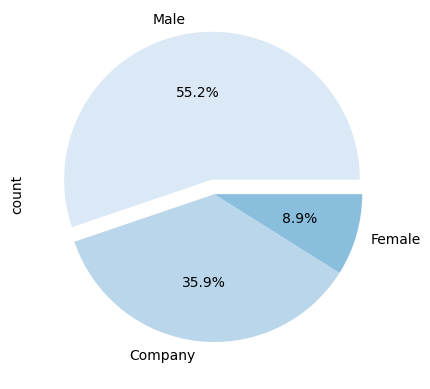

In [24]:
#df['creator_gender'].value_counts(dropna = False).plot(kind = 'pie', autopct='%1.1f%%')
labels = ['Male', "Female", "Company"]
#define Seaborn color palette to use
colors = sns.color_palette('Blues')[0:3]
explode = [0.1, 0, 0]
df['creator_gender'].value_counts(dropna = False).plot(kind = 'pie', autopct='%1.1f%%', colors = colors, explode =explode)

In [25]:
#Change Datatyoe of column 
df['total_channel_subscriber'] = df['total_channel_subscriber'].astype('str').astype('int')
df['no_of_likes'] = df['no_of_likes'].astype('int64') #Capital Int64 to not run into NaN values
df['no_of_playlist'] = df['no_of_playlist'].astype('int64')    

# Converting to string type
df['vid_view'] = df['vid_view'].astype(str)

#remove whitespace

df['vid_view'] = df['vid_view'].str.replace(",","").str.strip()
df['vid_view'] = pd.to_numeric(df['vid_view'])

#Convert it to string dtype
df['duration_in_seconds'] = df['duration_in_seconds'].astype(str)

In [26]:
df['duration_in_seconds'] = df['duration_in_seconds'].str.replace(",","").str.strip()

In [27]:
df['duration_in_seconds'] = pd.to_numeric(df['duration_in_seconds']).astype(int)

In [28]:
df[['total_channel_views']].head()

,total_channel_views
0,7964284
1,137535681
2,72945
3,541653219
4,3600496171


In [29]:
df['total_channel_views'] = df['total_channel_views'].astype(str)
df['total_channel_views'] = df['total_channel_views'].str.replace(",","").str.strip()
df['total_channel_views'] = pd.to_numeric(df['total_channel_views']).astype("int64")

In [30]:
df['no_of_comments'] = df['no_of_comments'].astype(str)
df['no_of_comments'] = df['no_of_comments'].str.replace(',','').str.strip()
df['no_of_comments'] = pd.to_numeric(df['no_of_comments'])

In [31]:
df[['no_of_comments']].head(5)

,no_of_comments
0,419
1,189
2,0
3,77
4,28221


In [32]:
# df['maximum_quality_of_the_video'] = df['maximum_quality_of_the_video'].astype(str)
# df['maximum_quality_of_the_video'] = df['maximum_quality_of_the_video'].apply(lambda x : x + 'p')

In [33]:
# df[['maximum_quality_of_the_video']]

In [34]:
df.subtitle.value_counts(dropna = False)

subtitle
yes    511
no     362
Name: count, dtype: int64

In [35]:
df['subtitle'] = df['subtitle'].map({'Yes':'yes', 'No': 'no', 'yes': 'yes'})

In [36]:
df.subtitle.value_counts(dropna = False)

subtitle
yes    511
NaN    362
Name: count, dtype: int64

In [37]:
df.head(5)

,video_link,vid_view,video_title,channel_url,creator_name,creator_gender,total_channel_subscriber,total_channel_views,duration_of_video,duration_in_seconds,...,maximum_quality_of_the_video,no_of_videos_the_channel,no_of_playlist,premiered_or_not,com_en_per_week,duration_in_minutes,upload_year,upload_month,upload_weekday,length_catagories
0,https://youtu.be/_0fUOJ55gis,146059,samse - didupe off-road royal enfield himalayan,https://www.youtube.com/c/sriharick,srihari ck,Male,40200,7964284,00:30:41,1841,...,1080p,462,12,No,1,31,2022,July,Friday,Long
1,https://youtu.be/_70MSLPRfZI,231969,bhoom baddhal web series,https://www.youtube.com/c/ChaibisketTelugu,Chai Bisket,Male,920000,137535681,00:14:24,864,...,1080p,251,12,Yes,2,14,2022,May,Sunday,Medium
2,https://youtu.be/_8gfCdt3H00?t=87s,878,"customer psychology, four views of consumer de...",https://www.youtube.com/channel/UCcIUnCsBfONvb...,Virda Warsi,Female,458,72945,00:08:12,492,...,720p,158,0,No,0,8,2021,February,Tuesday,Short
3,https://youtu.be/_CkFNJgKsFs,9965,top countries with proven natural gas reserves,https://www.youtube.com/c/trtworld,TRT,Company,1680000,541653219,00:01:06,66,...,1080p,46509,48,No,20,1,2022,September,Tuesday,Supershort
4,https://youtu.be/_GFkHA5EZdE,39780561,73 questions with selena gomez,Vogue - YouTube,Vogue,Company,12100000,3600496171,00:07:40,460,...,1080p,2872,113,No,1,8,2017,March,Tuesday,Short


In [38]:
#df.loc(['video_title'].value(), 'video_title').lower()
df['video_title'] = df['video_title'].str.lower()

In [39]:
df[['video_title']].head(5)

,video_title
0,samse - didupe off-road royal enfield himalayan
1,bhoom baddhal web series
2,"customer psychology, four views of consumer de..."
3,top countries with proven natural gas reserves
4,73 questions with selena gomez


In [40]:
df['creator_gender'].isnull().value_counts()

creator_gender
False    873
Name: count, dtype: int64

In [41]:
df['subtitle'].fillna(df['subtitle'].mode()[0], inplace = True) 
df['date_of_the_last_comment'].fillna(df['date_of_the_last_comment'].mode()[0], inplace = True) 

In [42]:
df['subtitle'].isnull().sum()

0

<Axes: xlabel='language_of_the_video'>

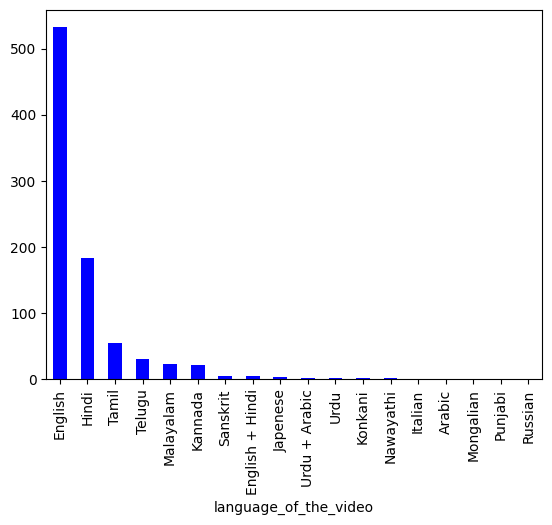

In [43]:
df['language_of_the_video'].value_counts(dropna = False).plot(kind = 'bar', color= 'blue')

In [44]:
df['duration_of_video'] = pd.to_datetime(df['duration_of_video'])
df['duration_of_video'] = df['duration_of_video'].apply(lambda x:x.time())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23596\3593367719.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['duration_of_video'] = pd.to_datetime(df['duration_of_video'])


In [45]:
df.dropna(subset = ['language_of_the_video', 'creator_name'], inplace = True)

In [46]:
df.isna().sum()

video_link                      0
vid_view                        0
video_title                     0
channel_url                     0
creator_name                    0
creator_gender                  0
total_channel_subscriber        0
total_channel_views             0
duration_of_video               0
duration_in_seconds             0
date_of_video_upload            0
no_of_likes                     0
language_of_the_video           0
subtitle                        0
video_description               0
hashtags                        0
no_of_comments                  0
date_of_the_last_comment        0
maximum_quality_of_the_video    0
no_of_videos_the_channel        0
no_of_playlist                  0
premiered_or_not                0
com_en_per_week                 0
duration_in_minutes             0
upload_year                     0
upload_month                    0
upload_weekday                  0
length_catagories               0
dtype: int64

So now there are no null values in our dataset and lets look into the columns of date and time category and see what changes we can make.

In [47]:
df[['duration_of_video','date_of_video_upload','date_of_the_last_comment']].head()

,duration_of_video,date_of_video_upload,date_of_the_last_comment
0,00:30:41,2022-07-29,2022-07-29
1,00:14:24,2022-05-22,2022-05-22
2,00:08:12,2021-02-09,2021-02-09
3,00:01:06,2022-09-13,2022-09-13
4,00:07:40,2017-03-21,2017-03-21


Convert string Date time into Python Date time object to perform better operation 

In [48]:
df['date_of_video_upload'] = pd.to_datetime(df['date_of_video_upload'])
df['date_of_the_last_comment'] = pd.to_datetime(df['date_of_video_upload'])

In [49]:
df['date_of_video_upload'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 873 entries, 0 to 872
Series name: date_of_video_upload
Non-Null Count  Dtype         
--------------  -----         
873 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 6.9 KB


In [50]:
df['duration_of_video'].info

<bound method Series.info of 0      00:30:41
1      00:14:24
2      00:08:12
3      00:01:06
4      00:07:40
         ...   
868    00:13:47
869    00:06:44
870    00:06:24
871    00:04:39
872    00:01:21
Name: duration_of_video, Length: 873, dtype: object>

In [51]:
#df.reset_index(inplace = True)

In [52]:
#df.drop(columns = ['index'], inplace = True)

In [53]:
df['duration_of_video'].info

<bound method Series.info of 0      00:30:41
1      00:14:24
2      00:08:12
3      00:01:06
4      00:07:40
         ...   
868    00:13:47
869    00:06:44
870    00:06:24
871    00:04:39
872    00:01:21
Name: duration_of_video, Length: 873, dtype: object>

In [54]:
df[['duration_of_video', 'duration_in_seconds','date_of_video_upload','date_of_the_last_comment']].dtypes

duration_of_video                   object
duration_in_seconds                  int32
date_of_video_upload        datetime64[ns]
date_of_the_last_comment    datetime64[ns]
dtype: object

In [55]:
df['duration_in_minutes'] = df.duration_of_video.apply(lambda x:(round(x.hour * 60 + x.minute + x.second/60)))

In [56]:
df[['duration_in_minutes']].head(5)

,duration_in_minutes
0,31
1,14
2,8
3,1
4,8


In [57]:
df['upload_year'] = df['date_of_video_upload'].apply(lambda x:x.strftime('%Y'))
df['upload_month'] = df['date_of_video_upload'].apply(lambda x:x.strftime('%B'))
df['upload_weekday'] = df['date_of_video_upload'].apply(lambda x:x.strftime('%A'))

In [58]:
df.duration_of_video

0      00:30:41
1      00:14:24
2      00:08:12
3      00:01:06
4      00:07:40
         ...   
868    00:13:47
869    00:06:44
870    00:06:24
871    00:04:39
872    00:01:21
Name: duration_of_video, Length: 873, dtype: object

Add three column year, month and weekday of uploading video

In [59]:
df.head(2)

,video_link,vid_view,video_title,channel_url,creator_name,creator_gender,total_channel_subscriber,total_channel_views,duration_of_video,duration_in_seconds,...,maximum_quality_of_the_video,no_of_videos_the_channel,no_of_playlist,premiered_or_not,com_en_per_week,duration_in_minutes,upload_year,upload_month,upload_weekday,length_catagories
0,https://youtu.be/_0fUOJ55gis,146059,samse - didupe off-road royal enfield himalayan,https://www.youtube.com/c/sriharick,srihari ck,Male,40200,7964284,00:30:41,1841,...,1080p,462,12,No,1,31,2022,July,Friday,Long
1,https://youtu.be/_70MSLPRfZI,231969,bhoom baddhal web series,https://www.youtube.com/c/ChaibisketTelugu,Chai Bisket,Male,920000,137535681,00:14:24,864,...,1080p,251,12,Yes,2,14,2022,May,Sunday,Medium


In [60]:
df.head().iloc[:,-4:]

,upload_year,upload_month,upload_weekday,length_catagories
0,2022,July,Friday,Long
1,2022,May,Sunday,Medium
2,2021,February,Tuesday,Short
3,2022,September,Tuesday,Supershort
4,2017,March,Tuesday,Short


(0.0, 100.0)

<Figure size 2000x800 with 0 Axes>

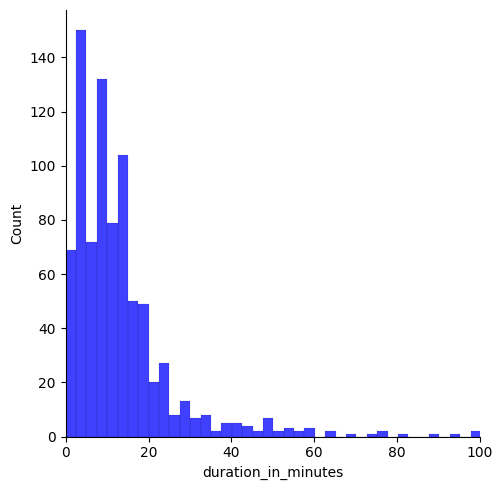

In [61]:
plt.figure(figsize = (20,8))
sns.displot(x = 'duration_in_minutes', data = df, color = "blue")
plt.xlim(0,100)

In [62]:
df['length_catagories'] = pd.cut(df['duration_in_minutes'], bins = [-1,2,10,30,60,1100] , labels = ['Supershort', 'Short', 'Medium','Long','SuperLong'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   video_link                    873 non-null    object        
 1   vid_view                      873 non-null    int64         
 2   video_title                   873 non-null    object        
 3   channel_url                   873 non-null    object        
 4   creator_name                  873 non-null    object        
 5   creator_gender                873 non-null    object        
 6   total_channel_subscriber      873 non-null    int32         
 7   total_channel_views           873 non-null    int64         
 8   duration_of_video             873 non-null    object        
 9   duration_in_seconds           873 non-null    int32         
 10  date_of_video_upload          873 non-null    datetime64[ns]
 11  no_of_likes                   87

In [64]:
df1 = df.filter(items = ['creator_name', 'total_channel_views'])
df1.groupby('creator_name').max().head(5)

,total_channel_views
creator_name,
100 Years Of Health,21328785
2 Brother Vlogs,18751275
365 Data Science,10864605
5-Minutes DÃ©cor,2504718854
A Girl From Uk02,13970


In [65]:
df1= df[df['creator_name'] == 'T-Series']
df1[['creator_name', 'total_channel_views']]

,creator_name,total_channel_views
813,T-Series,202000000000


In [66]:
df.total_channel_views.apply(lambda x : str(round(x / 10**6, 6)) + 'M')

0         7.964284M
1       137.535681M
2         0.072945M
3       541.653219M
4      3600.496171M
           ...     
868      129.92669M
869      129.92669M
870       5.104872M
871       5.104872M
872     728.858923M
Name: total_channel_views, Length: 873, dtype: object

In [67]:
df.length_catagories

0            Long
1          Medium
2           Short
3      Supershort
4           Short
          ...    
868        Medium
869         Short
870         Short
871         Short
872    Supershort
Name: length_catagories, Length: 873, dtype: category
Categories (5, object): ['Supershort' < 'Short' < 'Medium' < 'Long' < 'SuperLong']

# EDA

In [68]:
#df.groupby('creator_name')[['total_channel_subscriber']].apply(lambda x : (x > 2*10**8)).sum().\
#reset_index( name = 'count')
df[df['total_channel_subscriber'] > 2 * 10 ** 8][['creator_name', 'total_channel_subscriber']]

,creator_name,total_channel_subscriber
415,Edureka,305200000
521,Bhushan Kumar,225000000
813,T-Series,225000000


## Top 10 Channels Subscribers wise 

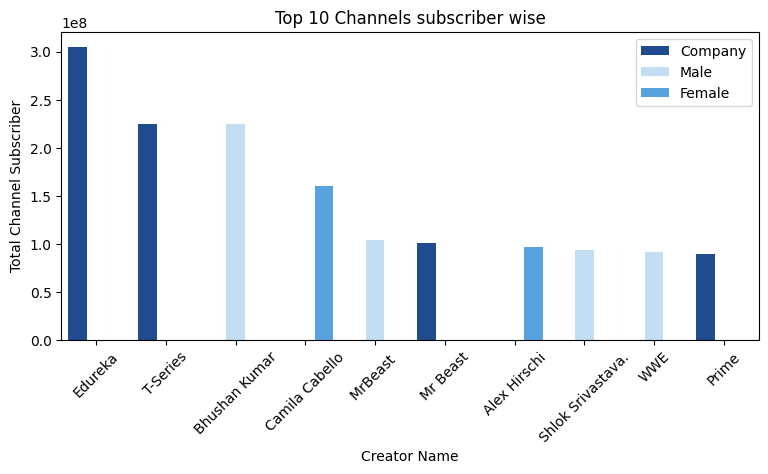

In [69]:
highest_subscribe(df)

In [70]:
df[['creator_name', 'creator_gender','total_channel_subscriber']].groupby('creator_name').max().\
                        sort_values(by = 'total_channel_subscriber',ascending = False).head(10)

,creator_gender,total_channel_subscriber
creator_name,,
Edureka,Company,305200000
T-Series,Company,225000000
Bhushan Kumar,Male,225000000
Camila Cabello,Female,160000000
MrBeast,Male,104000000
Mr Beast,Company,101000000
Alex Hirschi,Female,97000000
Shlok Srivastava.,Male,93900000
WWE,Male,91000000


### What we can know 

* As per the dataset, we can see that more than half of the top 10 channels are by individuals not comapanies. Males and Companies have equal number of channels in the top and double that of female.

## Top 10 Channels View wise 

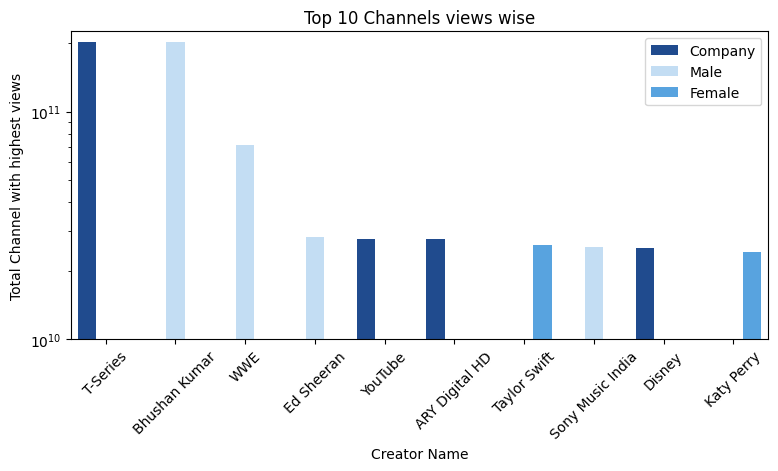

In [71]:
highest_views(df)

### What we can know 

* We observe that most of the channels belong to music industry. It seems music channels get the highest number of views of all categories.

In [72]:
df[['creator_name', 'creator_gender','total_channel_views']].groupby('creator_name').max().\
                        sort_values(by = 'total_channel_views',ascending = False).head(10)

,creator_gender,total_channel_views
creator_name,,
T-Series,Company,202000000000
Bhushan Kumar,Male,202000000000
WWE,Male,71528224019
Ed Sheeran,Male,28173317993
YouTube,Company,27725160330
ARY Digital HD,Company,27479278750
Taylor Swift,Female,25906311446
Sony Music India,Male,25516868039
Disney,Company,25216557237


We observe that most of the channels belong to music industry. It seems music 
channels get the highest number of views of all categories.

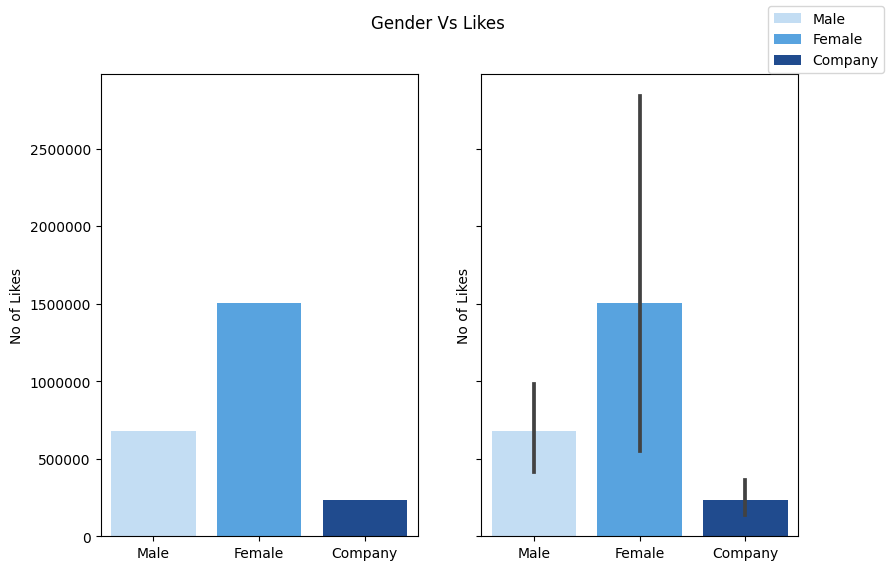

In [73]:
numberOfLike_byGen(df)

### What can we know 

* The videos made by Female gender are garning more likes than Males and Company by a huge margin.

In [74]:
df.loc[:, ['length_catagories']].head()

,length_catagories
0,Long
1,Medium
2,Short
3,Supershort
4,Short


handle is artist of the plot

new = df.groupby('creator_name')[['total_channel_subscriber']].max().\
sort_values(by = "total_channel_subscriber", ascending = False).head()
fig, ax = plt.subplots()
sns.barplot(data = new, label = "creator name")
plt.ylabel("total_channel_subscriber")

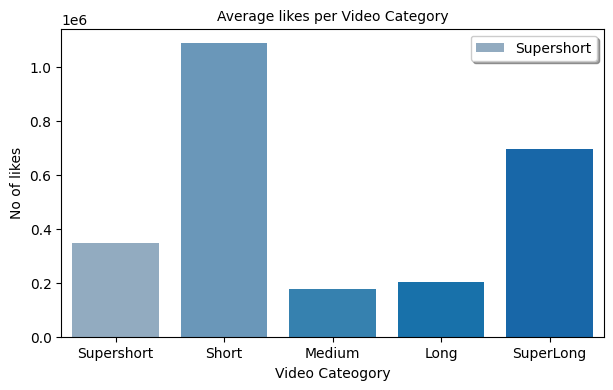

In [75]:
numberofLike_by_min(df)

### What can we know

* Videos of short duration between 2 to 10 minutes are getting most likes on average followed by SuperLong videos of more than a hour long.

In [76]:
df.dtypes

video_link                              object
vid_view                                 int64
video_title                             object
channel_url                             object
creator_name                            object
creator_gender                          object
total_channel_subscriber                 int32
total_channel_views                      int64
duration_of_video                       object
duration_in_seconds                      int32
date_of_video_upload            datetime64[ns]
no_of_likes                              int64
language_of_the_video                   object
subtitle                                object
video_description                       object
hashtags                                 int64
no_of_comments                           int64
date_of_the_last_comment        datetime64[ns]
maximum_quality_of_the_video            object
no_of_videos_the_channel                 int64
no_of_playlist                           int64
premiered_or_

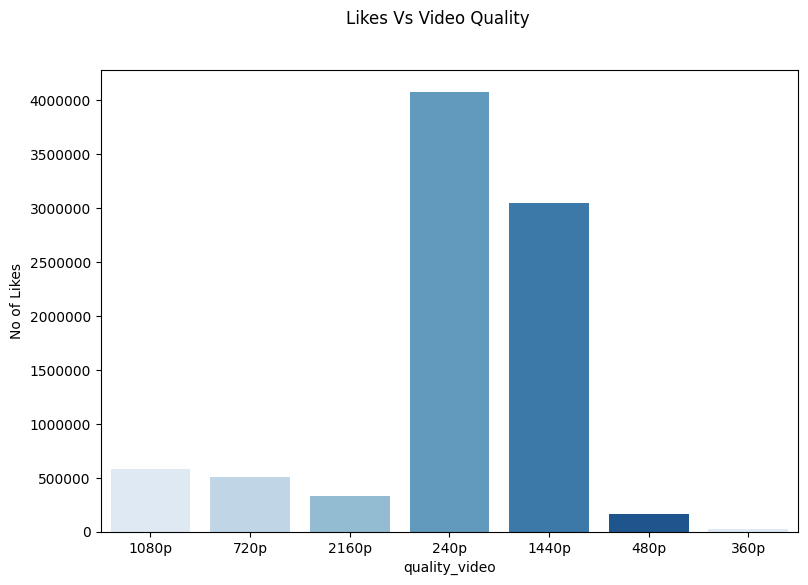

In [77]:
video_quality_Like(df)

### What can we know 

* The videos of 240p quality are getting most likes on average but there are 3 videos of 240p quality which are so famous and skewing the result. But the general trend is people are liking the videos of highest quality.

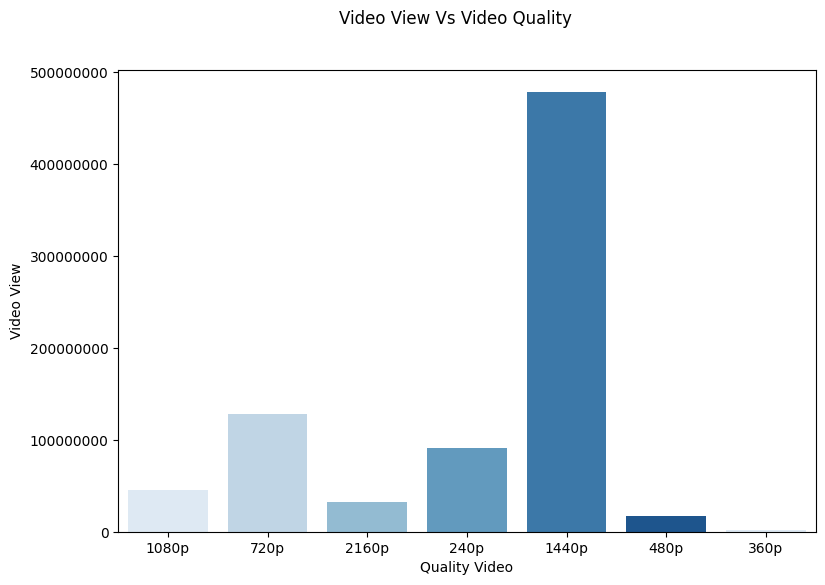

In [78]:
video_quality_view(df)

### What can we know 

* The videos of 1140p quality are getting most view on average as the general trend is people are liking the videos of highest quality.

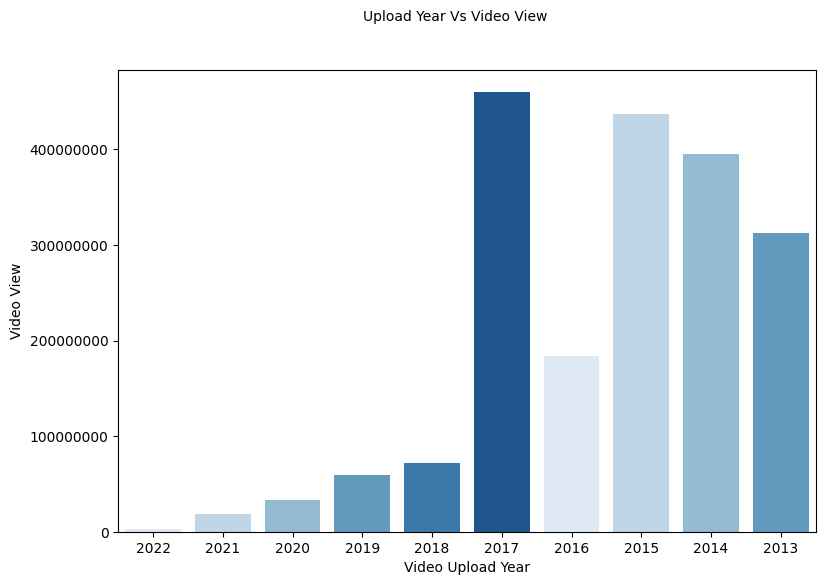

In [79]:
video_view_year(df)

### What we can know 

* Contrary to my expectation of average video views increasing every year, it fell down from last 5 years. Videos uploaded in 2017,2015,2014,2013 got more views on average compared to all years.

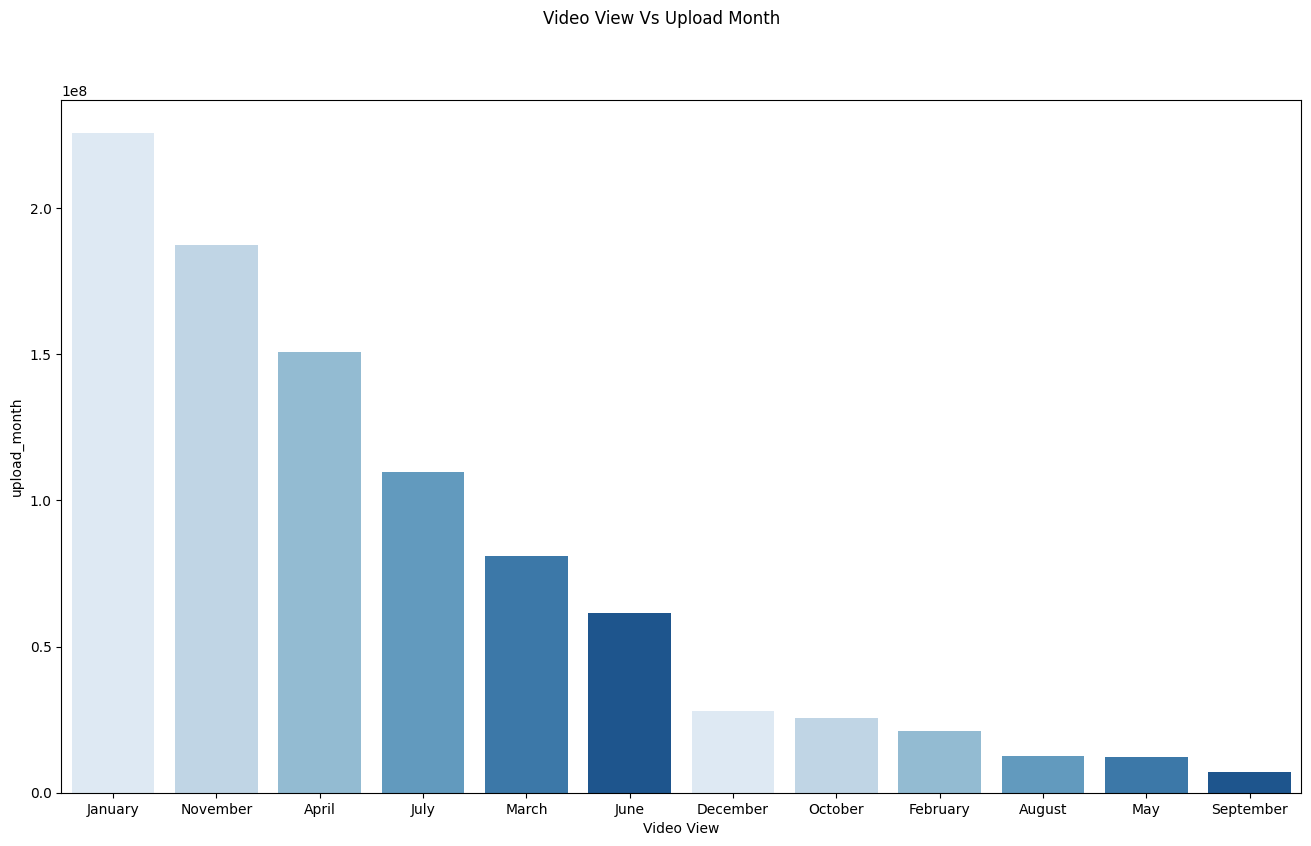

In [80]:
video_view_month(df)

Videos uploaded in months of January and November got the most likes on average.

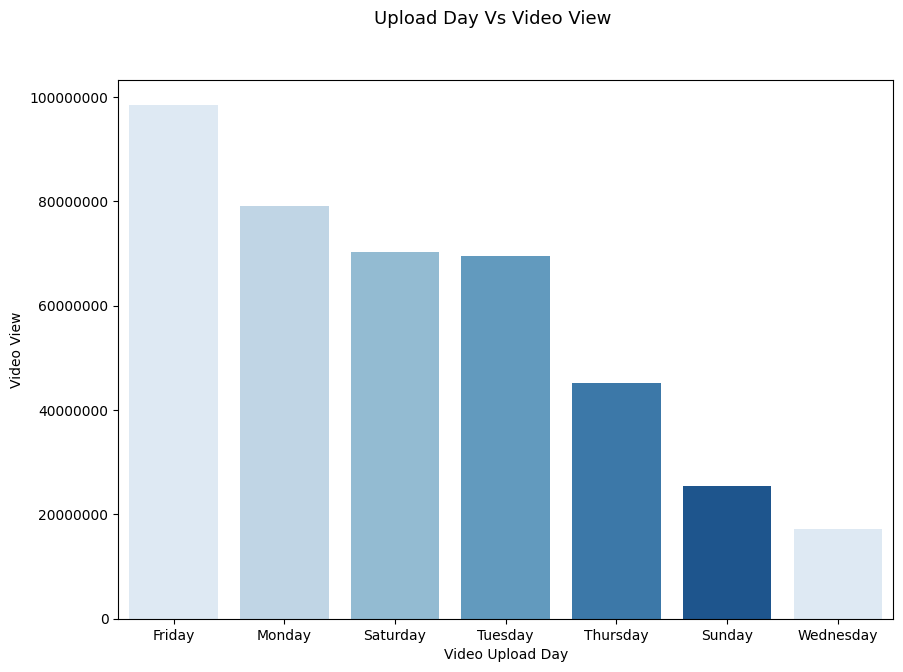

In [81]:
video_view_week(df)

### What we can know 

* Videos uploaded on Fridays are getting the most views on average and those uploaded on Wednesday are getting the least.

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   video_link                    873 non-null    object        
 1   vid_view                      873 non-null    int64         
 2   video_title                   873 non-null    object        
 3   channel_url                   873 non-null    object        
 4   creator_name                  873 non-null    object        
 5   creator_gender                873 non-null    object        
 6   total_channel_subscriber      873 non-null    int32         
 7   total_channel_views           873 non-null    int64         
 8   duration_of_video             873 non-null    object        
 9   duration_in_seconds           873 non-null    int32         
 10  date_of_video_upload          873 non-null    datetime64[ns]
 11  no_of_likes                   87

In [83]:
df['language_of_the_video']

0            Kannada
1             Telugu
2              Hindi
3            English
4            English
           ...      
868    Urdu + Arabic
869        Nawayathi
870        Nawayathi
871             Urdu
872          English
Name: language_of_the_video, Length: 873, dtype: object

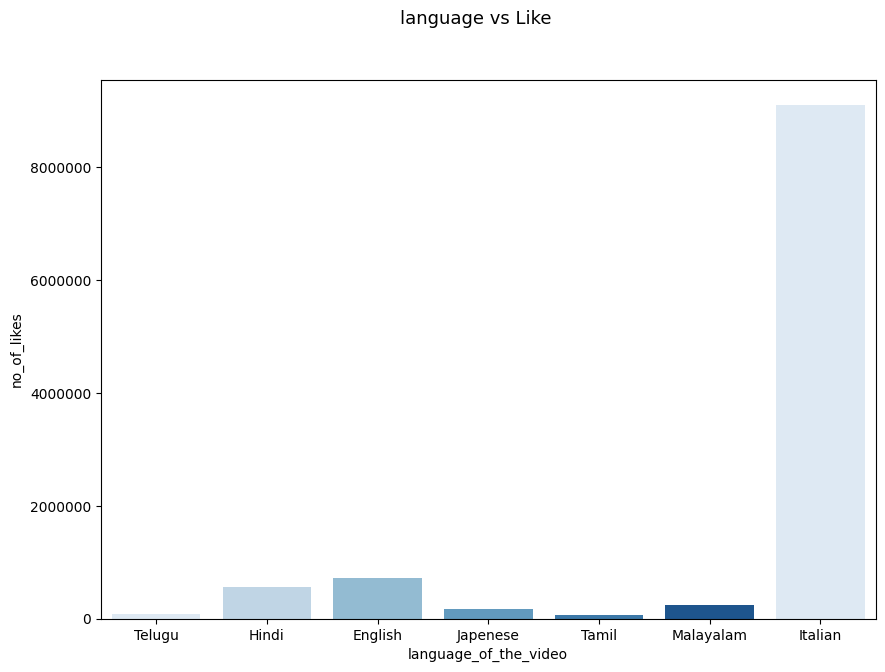

In [84]:
language_of_video(df)

In [85]:
language_le = preprocessing.LabelEncoder()
language_le.fit(df["language_of_the_video"])
language_le.classes_
df["language_of_the_video"] = language_le.transform(df["language_of_the_video"])

In [86]:
language_mapping = {}
for language_code in df['language_of_the_video'].unique():
    language_mapping[language_code] = language_le.inverse_transform([language_code])[0]
    
language_mapping

{6: 'Kannada',
 15: 'Telugu',
 3: 'Hindi',
 1: 'English',
 5: 'Japenese',
 14: 'Tamil',
 11: 'Punjabi',
 8: 'Malayalam',
 9: 'Mongalian',
 12: 'Russian',
 4: 'Italian',
 2: 'English + Hindi',
 13: 'Sanskrit',
 7: 'Konkani',
 0: 'Arabic',
 16: 'Urdu',
 17: 'Urdu + Arabic',
 10: 'Nawayathi'}

### Change from textual to numeric number 

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


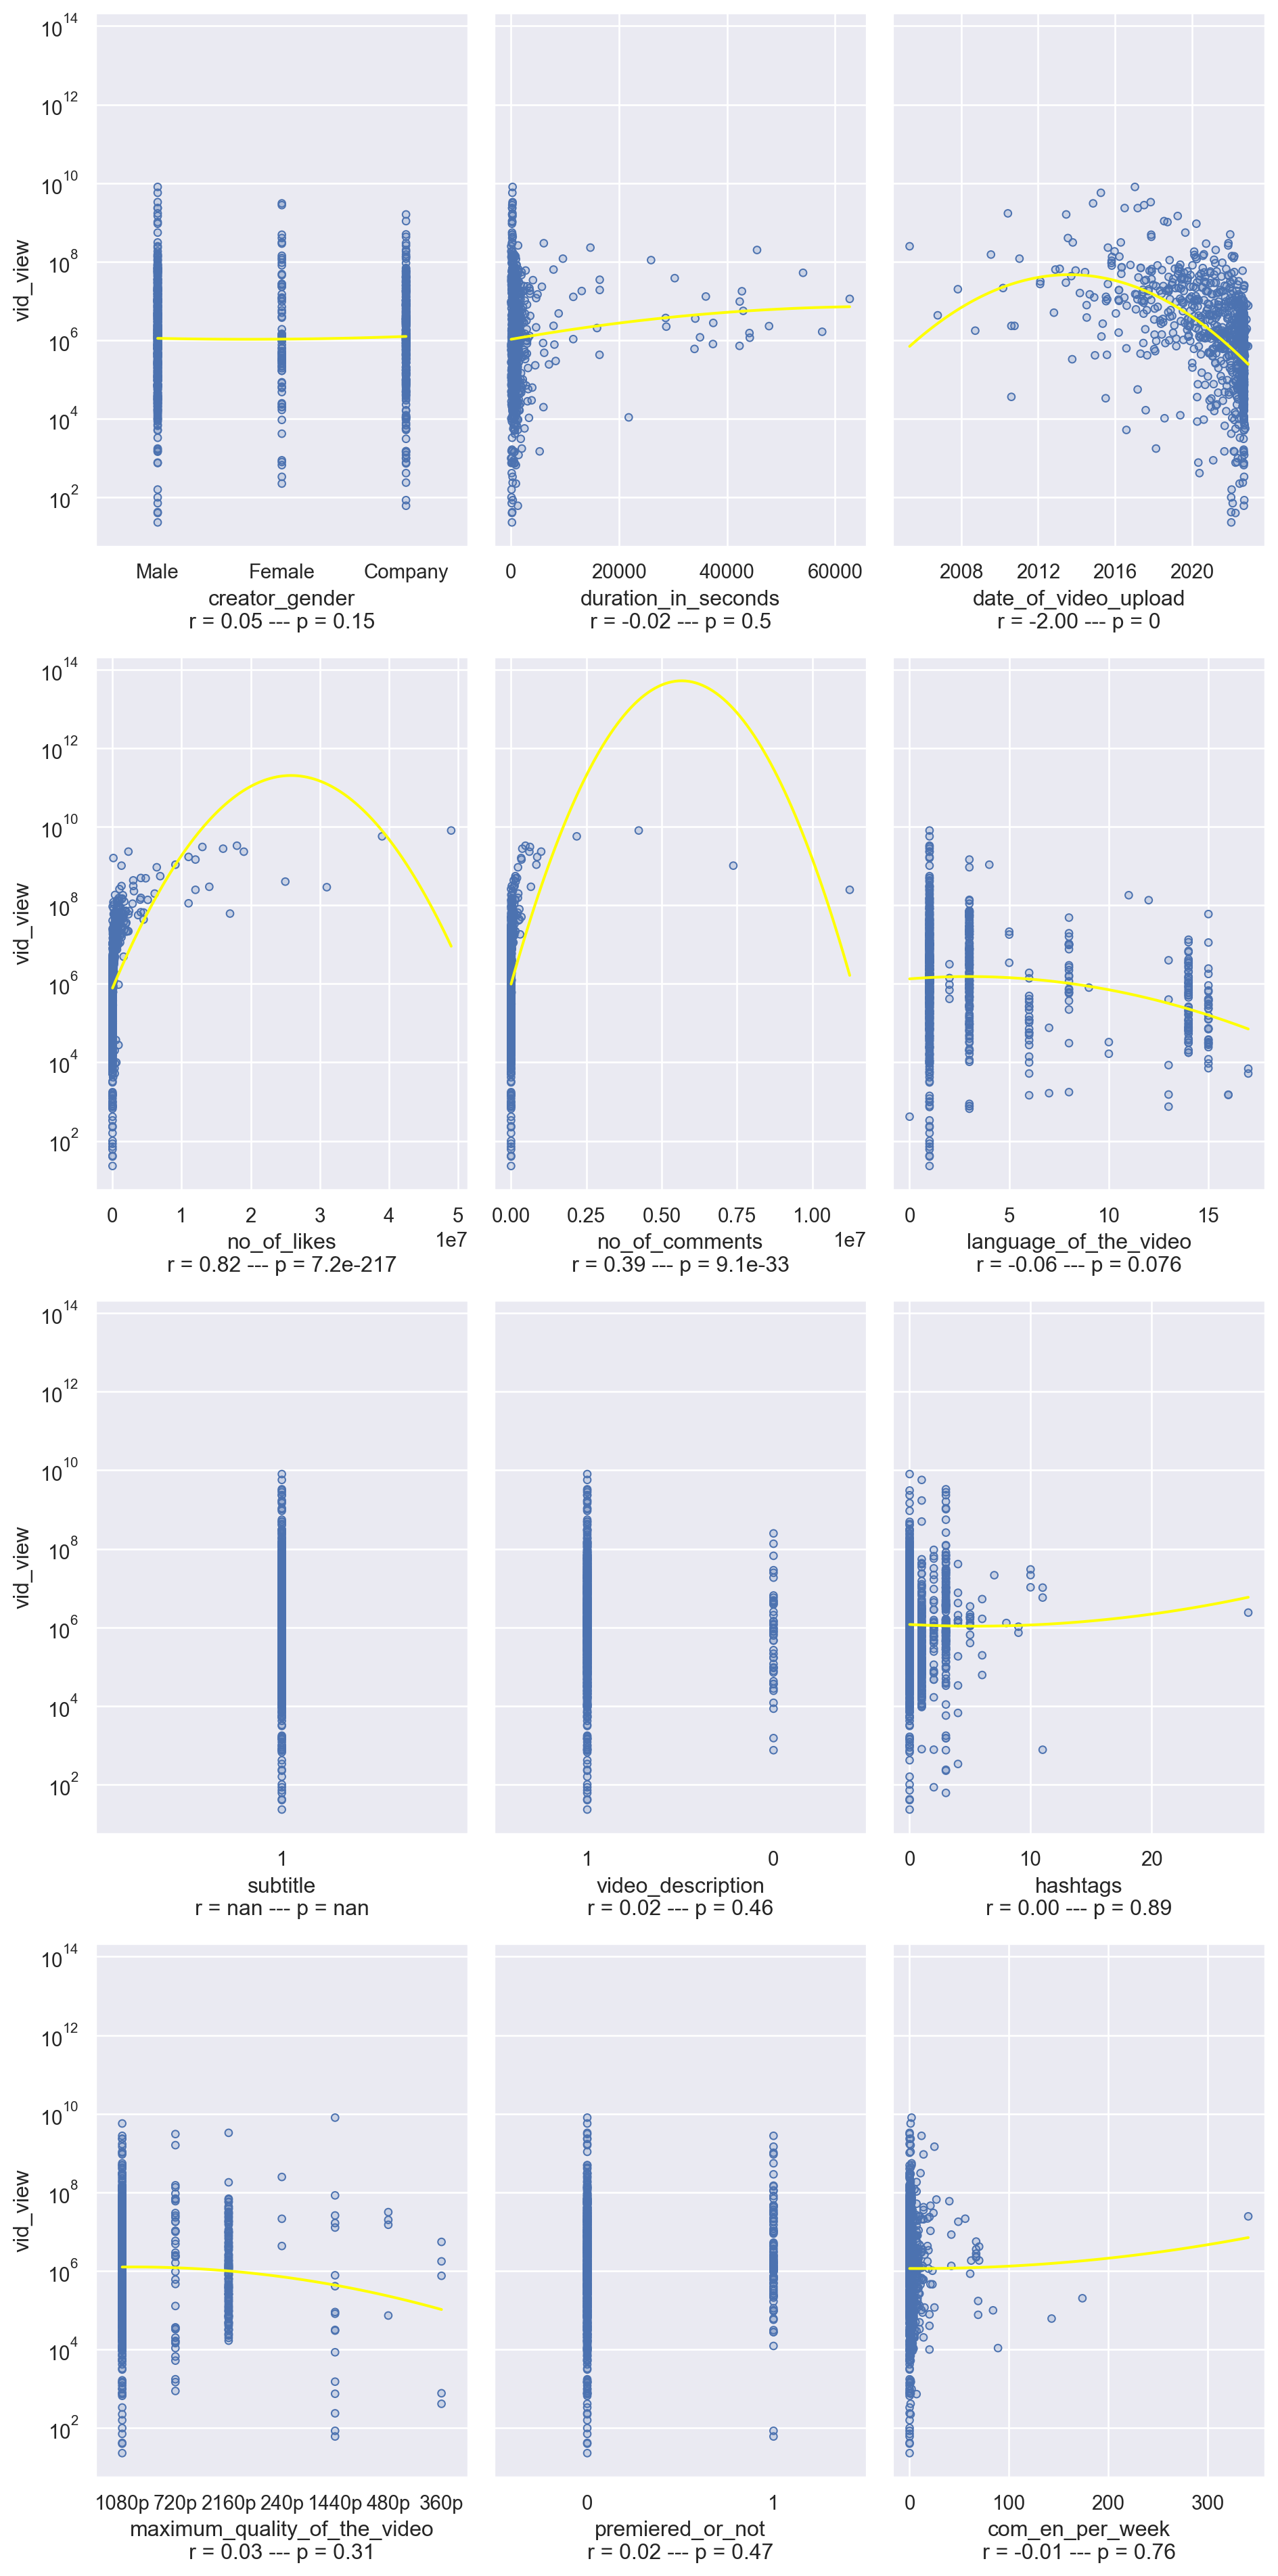

In [87]:
#Convert to int and convert int to string 

def convt_int(s: str) -> int:
    mapping = {
        "no": 0,
        "yes": 1,
    }
    
    return mapping[s]

df["subtitle"] = df["subtitle"].apply(lambda x: str(convt_int(x.lower())))
df["video_description"] = df["video_description"].apply(lambda x: str(convt_int(x.lower())))
df["premiered_or_not"] = df["premiered_or_not"].apply(lambda x: str(convt_int(x.lower())))


new_df = df[["vid_view", "creator_gender","duration_in_seconds", "date_of_video_upload","no_of_likes", "no_of_comments","language_of_the_video", "subtitle", "video_description", "hashtags", "maximum_quality_of_the_video", "premiered_or_not", "com_en_per_week"]]

pairplot_relevancy_video_view(new_df)

### Purpose
To follow the p-value policy contraint, the relation of our dataset is showing as follow 
* the video view have some impact by some feature which include number of like, language of the video, hastage, and community engagment.
* for other feature, it was rejected 

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


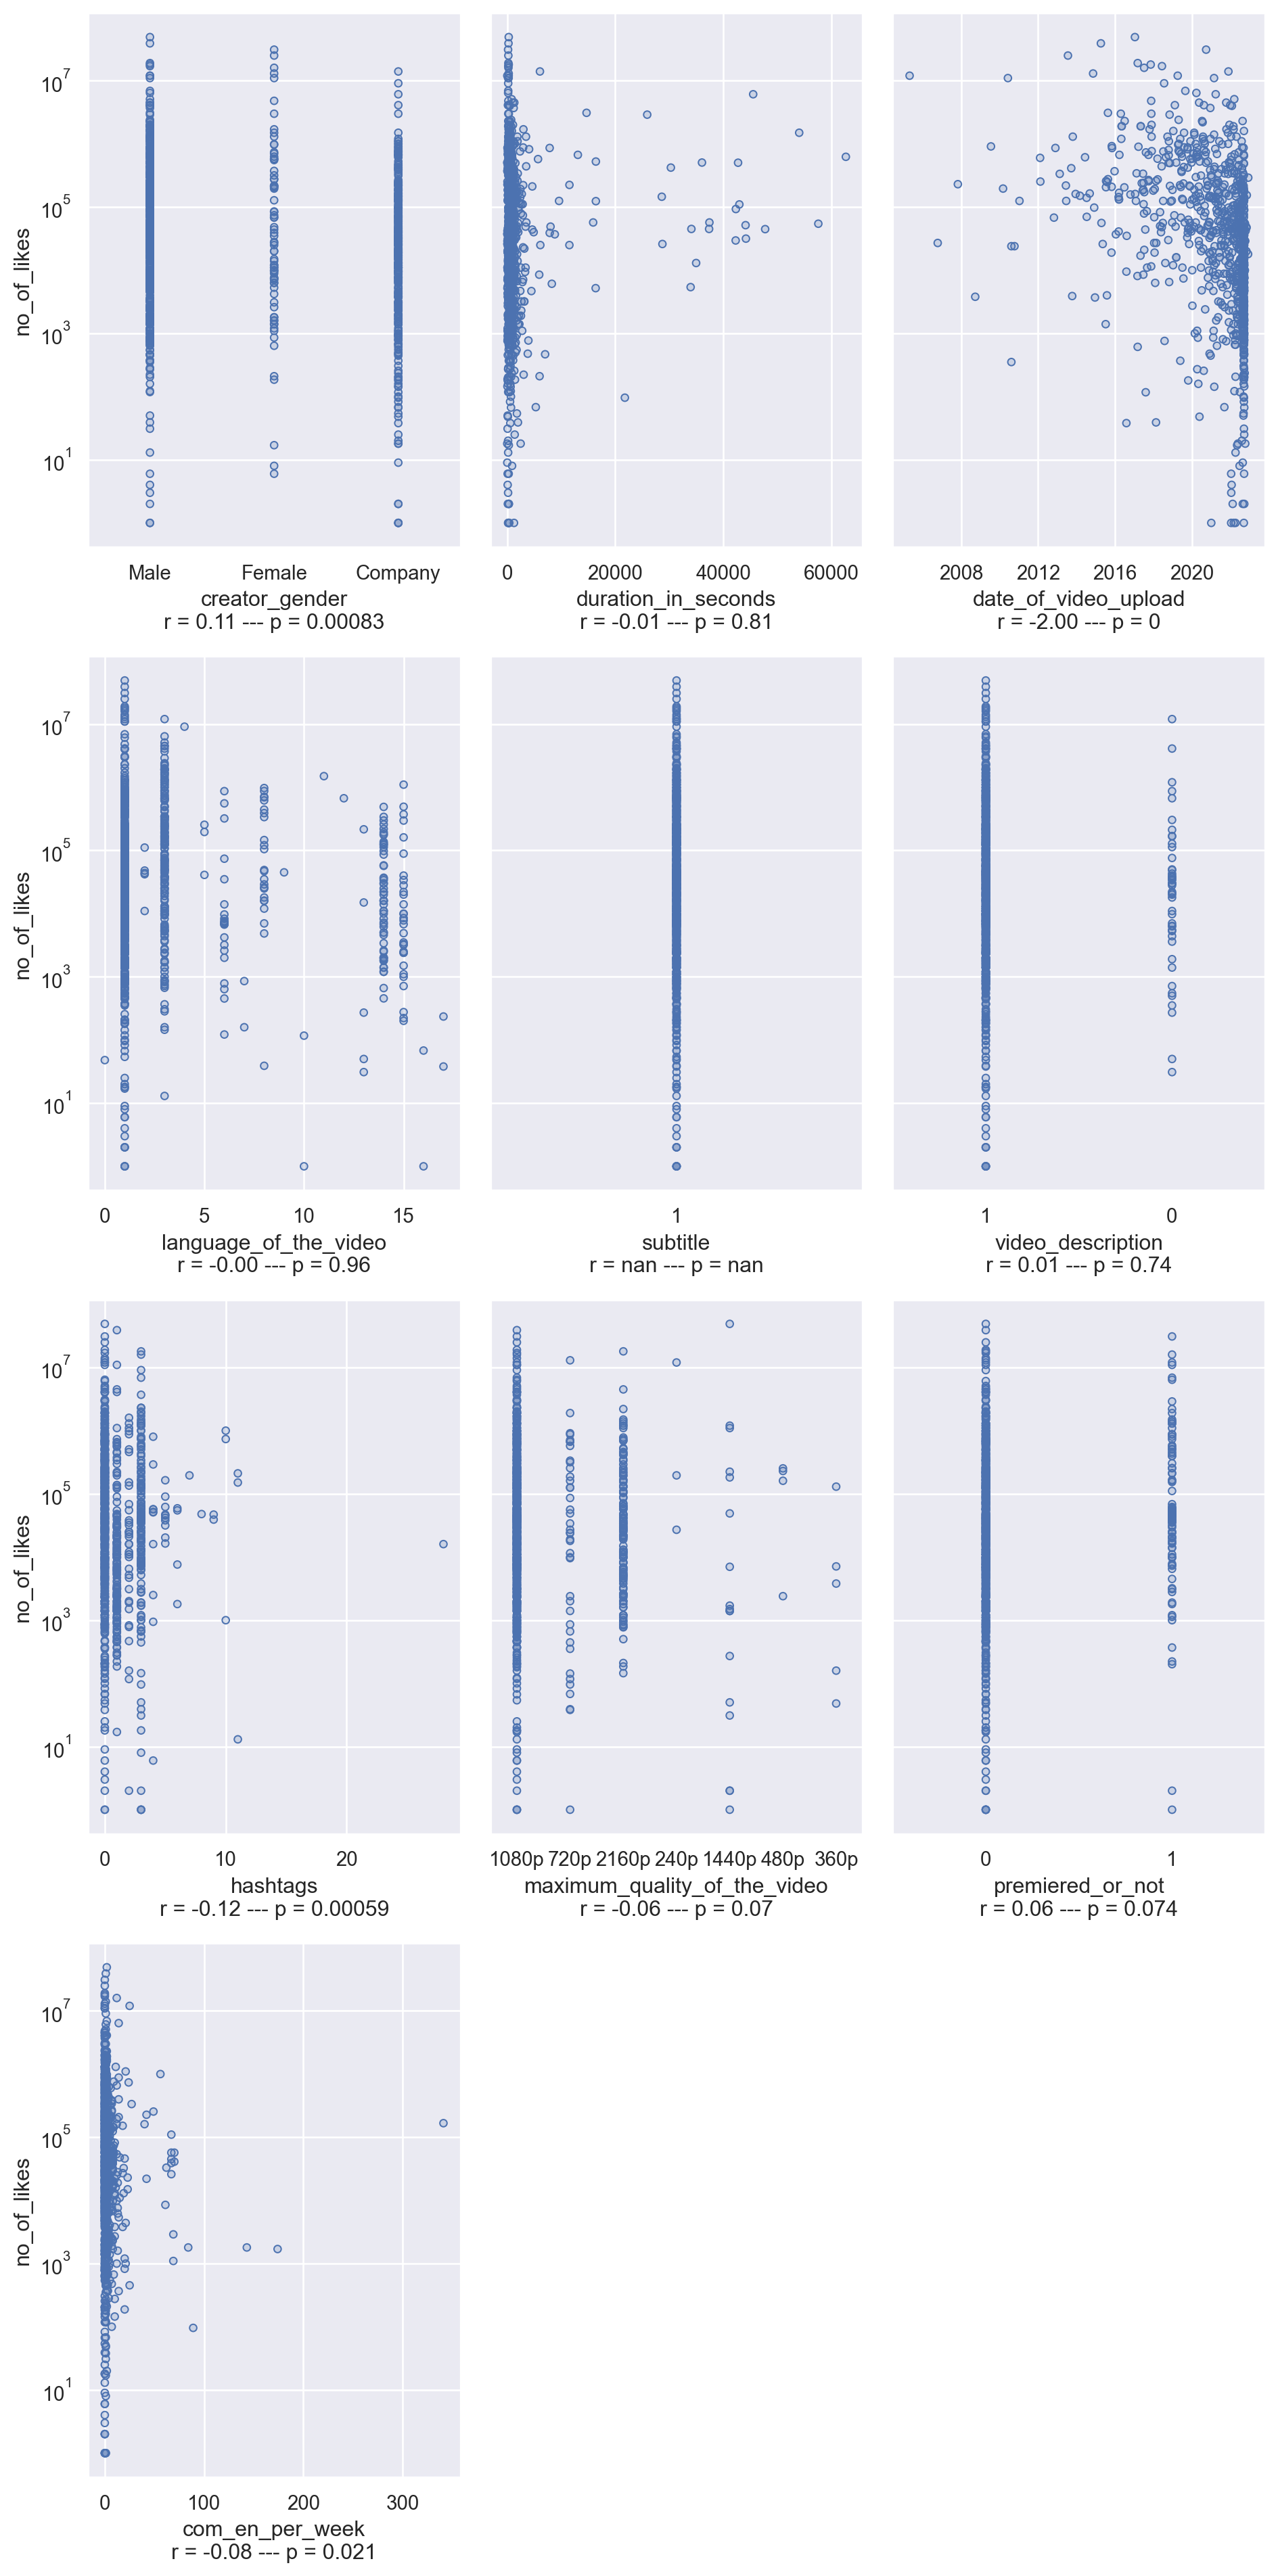

In [88]:
df_updated = df[["no_of_likes", "creator_gender", "duration_in_seconds", "date_of_video_upload", "language_of_the_video", "subtitle", "video_description", "hashtags", "maximum_quality_of_the_video", "premiered_or_not", "com_en_per_week"]]

pairplot_relevancy_num_likes(df_updated)

In [89]:
df['hashtags'].unique()

array([ 0,  1,  3,  2,  7, 11,  4,  5,  6, 10,  9,  8, 28], dtype=int64)

Text(0.5, 1.0, 'Number of Hastags Vs Video View')

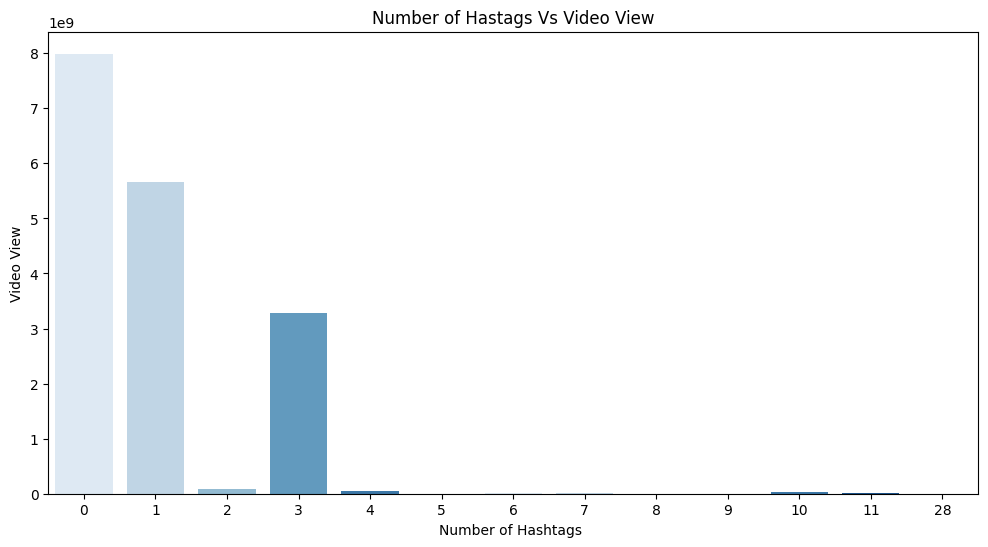

In [90]:
df_new = df[['vid_view', 'hashtags']].groupby('hashtags').max().sort_values('vid_view', ascending = False).reset_index()
fig, ax = plt.subplots(figsize = (12,6), sharey = True )
palette = sns.color_palette('Blues')[0:14]
sns.barplot(x = "hashtags", y="vid_view", palette = palette, ax=ax, data = df_new, errorbar= None )
ax.set_xlabel('Number of Hashtags ')
ax.set_ylabel('Video View')
ax.set_title('Number of Hastags Vs Video View')

When uploading video with 3 hashtags is likely getting most views according to the graph 

In [91]:
!pip3 install --upgrade pandas
import pandas as pd

print(pd.__version__)

2.0.3


In [92]:
print(df)

                             video_link  vid_view  \
0          https://youtu.be/_0fUOJ55gis    146059   
1          https://youtu.be/_70MSLPRfZI    231969   
2    https://youtu.be/_8gfCdt3H00?t=87s       878   
3          https://youtu.be/_CkFNJgKsFs      9965   
4          https://youtu.be/_GFkHA5EZdE  39780561   
..                                  ...       ...   
868        https://youtu.be/GS18WawA-t0      6892   
869        https://youtu.be/_tc_APkjH2Q     16554   
870        https://youtu.be/Xfj4osSYfhU     32798   
871        https://youtu.be/mGEHqwVz0eI      1503   
872        https://youtu.be/UGATpt0I4vA    429966   

                                           video_title  \
0      samse - didupe off-road royal enfield himalayan   
1                             bhoom baddhal web series   
2    customer psychology, four views of consumer de...   
3       top countries with proven natural gas reserves   
4                       73 questions with selena gomez   
..             

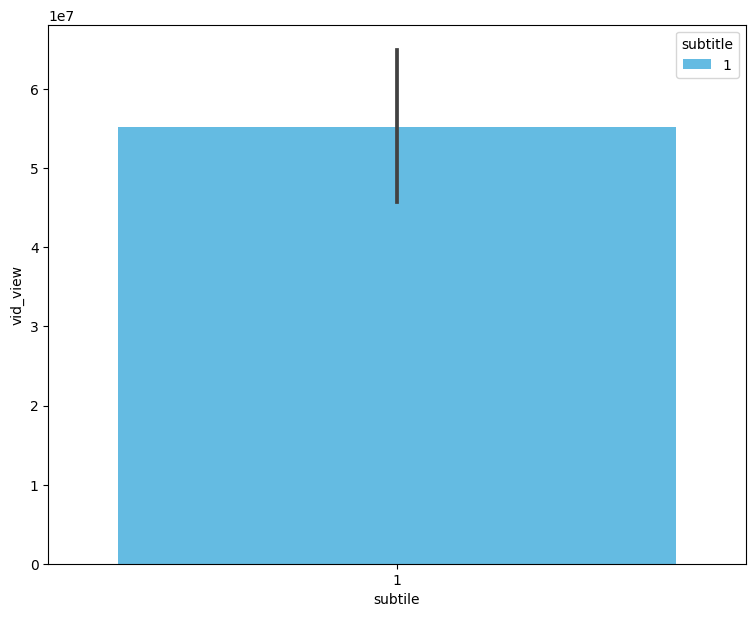

In [93]:
fig, ax = plt.subplots(1, figsize = (9,7), sharey = True )
color = {"1" : "#4fc3f7", "0": "#01579b"}
sns.barplot(x = 'subtitle', y = 'vid_view', data= df, palette = color, estimator = "mean", hue = 'subtitle', errorbar = ("ci", 50))
ax.set_xlabel("subtile")
ax.set_ylabel("vid_view")
plt.show()

Creating video along with uploading the subsitle will be more likely increased compared to none of subtitle 

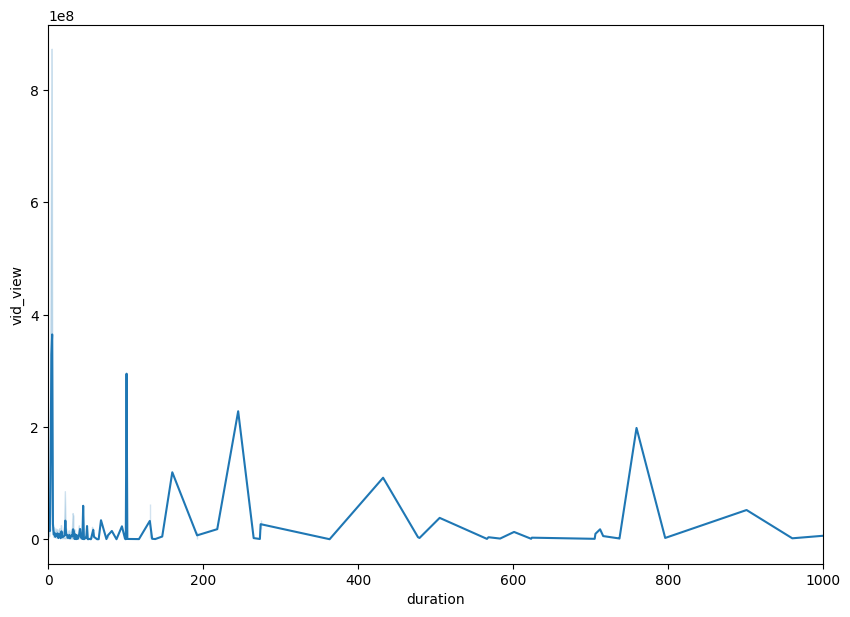

In [94]:
fig, ax = plt.subplots(1, figsize = (10,7), sharey = True )
sns.lineplot(x = 'duration_in_minutes', y = 'vid_view', data= df)
ax.set_xlabel("duration")
ax.set_ylabel("vid_view")
plt.xlim(0,1000)
plt.show()

In second graph, I limited length of x axis. Then we can find out that the values between 150 and 300 seconds are the highest.

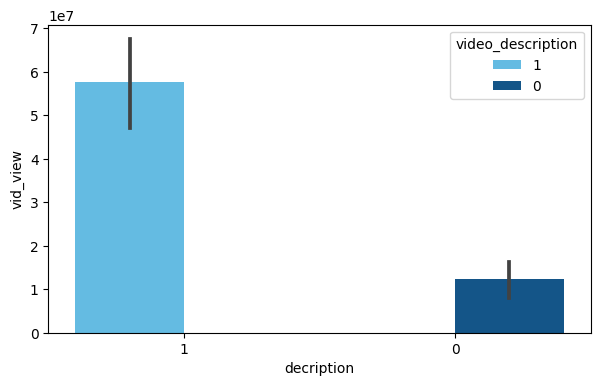

In [95]:
fig, ax = plt.subplots(1, figsize = (7,4), sharey = True )
color = {"1" : "#4fc3f7", "0": "#01579b"}
sns.barplot(x = 'video_description', y = 'vid_view', data= df, estimator = "mean", palette = color,  hue = 'video_description', errorbar = ("ci", 50))
ax.set_xlabel("decription")
ax.set_ylabel("vid_view")
plt.show()

Decription is significant to make the number of views increased aligned with the graph, the video have decription is likely geting the higher view compared to none of des. 

In [96]:
df[["creator_gender", "vid_view"]].groupby('creator_gender').mean().sort_values("vid_view", ascending = False)

,vid_view
creator_gender,
Female,1.046396e+08
Male,6.814052e+07
Company,2.301738e+07


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23596\2794806881.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'creator_gender', y = 'vid_view', data= df, estimator = "mean", hue= "creator_gender",ci = None,  palette = color, errorbar = ("ci", 50))


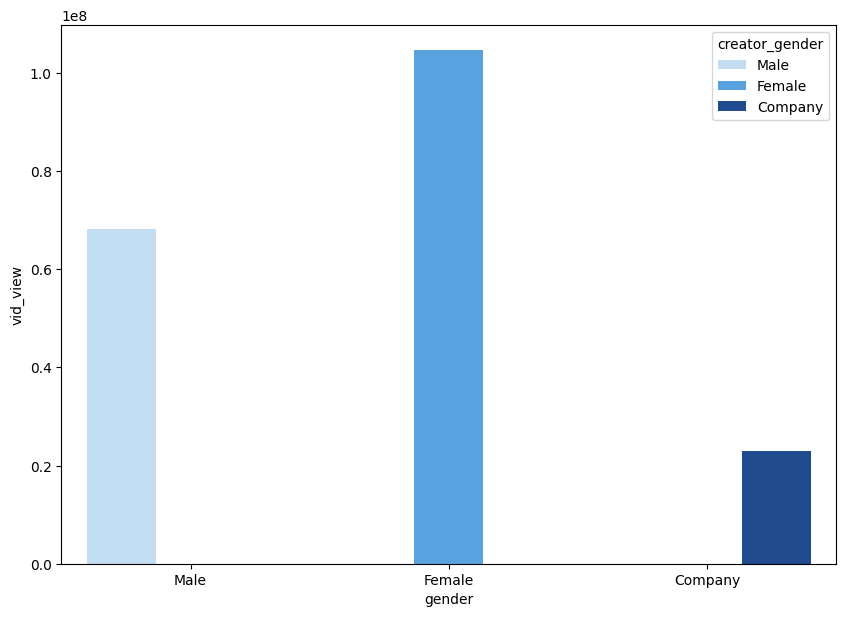

In [97]:
fig, ax = plt.subplots(1, figsize = (10,7), sharey = True )
color = {'Male': '#bbdefb', 'Female': '#42a5f5', 'Company': '#0d47a1'}
sns.barplot(x = 'creator_gender', y = 'vid_view', data= df, estimator = "mean", hue= "creator_gender",ci = None,  palette = color, errorbar = ("ci", 50))
ax.set_xlabel("gender")
ax.set_ylabel("vid_view")
plt.show()

Female gender look like getting high of percentage based on video view compared to male gender and companay gender 

In [98]:
df.duplicated(keep= "first")

0      False
1      False
2      False
3      False
4      False
       ...  
868    False
869    False
870    False
871    False
872    False
Length: 873, dtype: bool

In [99]:
df['vid_view'].dtypes

dtype('int64')

In [100]:
df['vid_view'].duplicated().value_counts()

vid_view
False    873
Name: count, dtype: int64

In [101]:
duplicate = df.duplicated().value_counts()
 
print("----Duplicate Rows---- :")
duplicate

----Duplicate Rows---- :


False    873
Name: count, dtype: int64

In [102]:
df[['vid_view']].describe()

,vid_view
count,8.730000e+02
mean,5.522344e+07
std,4.070861e+08
min,2.300000e+01
25%,1.943890e+05
50%,1.250286e+06
75%,9.002909e+06
max,7.990990e+09


In [103]:
df.isna()

,video_link,vid_view,video_title,channel_url,creator_name,creator_gender,total_channel_subscriber,total_channel_views,duration_of_video,duration_in_seconds,...,maximum_quality_of_the_video,no_of_videos_the_channel,no_of_playlist,premiered_or_not,com_en_per_week,duration_in_minutes,upload_year,upload_month,upload_weekday,length_catagories
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
869,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
870,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
871,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Text(0.5, 1.0, 'Post Per Week Vs Video View')

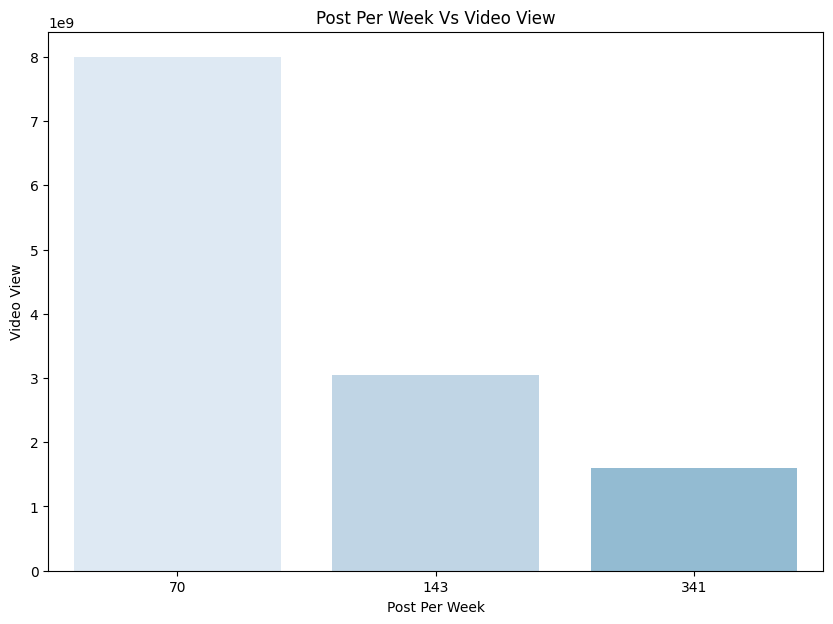

In [104]:
df_new = df[['vid_view', 'com_en_per_week', 'creator_gender']].groupby('creator_gender').max()
fig, ax = plt.subplots(figsize = (10,7), sharey = True )
palette = sns.color_palette('Blues')[0:4]
sns.barplot(x = "com_en_per_week", y="vid_view", palette = palette, ax=ax, data = df_new)
ax.set_xlabel('Post Per Week')
ax.set_ylabel('Video View')
ax.set_title('Post Per Week Vs Video View')

* Based on the actual data, when the number of posts is increase, the number of view will be increase respectively 
* By this, 70 posts is dramatic getting high percentage of number of views compared to other amounts, and it is applied by male gender

In [105]:
df_new = df[['vid_view', 'com_en_per_week', 'creator_gender']].groupby('creator_gender').max().sort_values("vid_view", ascending = False )
df_new

,vid_view,com_en_per_week
creator_gender,,
Male,7990989731,70
Female,3047466969,143
Company,1591878444,341


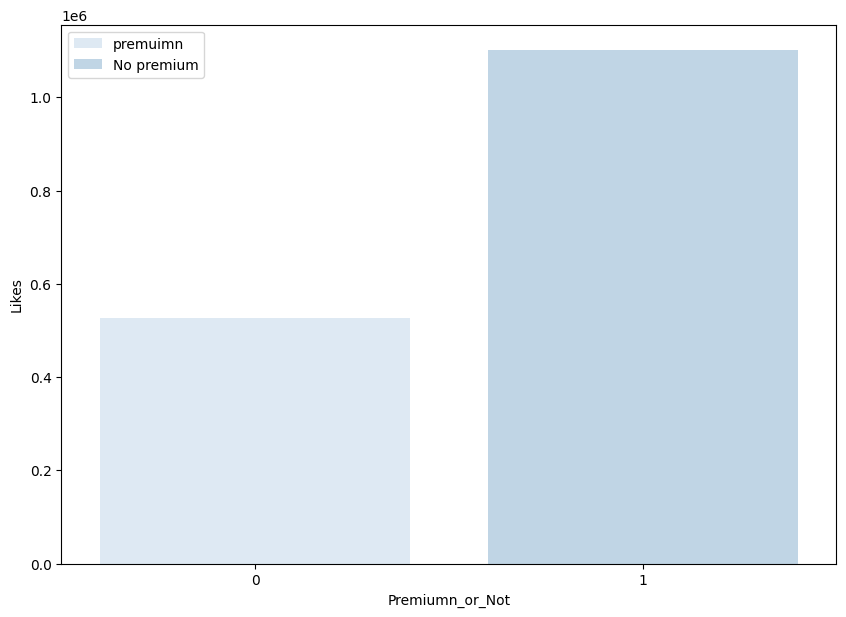

In [106]:
fig, ax = plt.subplots(figsize = (10,7), sharey = True )
palette = sns.color_palette('Blues')[0:2]
label =['premuimn', 'No premium']
sns.barplot(x = "premiered_or_not", y="no_of_likes", palette = palette, ax=ax, data = df, errorbar = None )
ax.set_xlabel('Premiumn_or_Not')
ax.set_ylabel('Likes')
plt.legend(loc = "best", handles=ax.get_children()[0:2], labels=label)

In [107]:
df[['vid_view', 'hashtags', 'creator_gender']].groupby('creator_gender').max().sort_values("vid_view", ascending = False )

,vid_view,hashtags
creator_gender,,
Male,7990989731,11
Female,3047466969,6
Company,1591878444,28


## Removie Outlier

<Axes: >

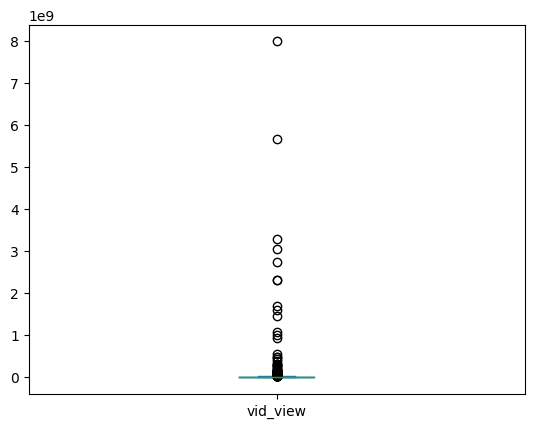

In [108]:
df['vid_view'].plot(kind = 'box')

In [109]:
df[["vid_view"]].describe()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   video_link                    873 non-null    object        
 1   vid_view                      873 non-null    int64         
 2   video_title                   873 non-null    object        
 3   channel_url                   873 non-null    object        
 4   creator_name                  873 non-null    object        
 5   creator_gender                873 non-null    object        
 6   total_channel_subscriber      873 non-null    int32         
 7   total_channel_views           873 non-null    int64         
 8   duration_of_video             873 non-null    object        
 9   duration_in_seconds           873 non-null    int32         
 10  date_of_video_upload          873 non-null    datetime64[ns]
 11  no_of_likes                   87

### What we decide 
We decided not to remove outlier in our target variable since our dataset is too small so the bias can more likely happended

### Find Correlation 

* We decide to Select only significant feature according to the p-value condition( reject for all value which less than 0.05)

In [110]:
#Select significant feature based on pairplot above using p-value )
df3 = df[["vid_view", "duration_in_minutes", "no_of_likes", "language_of_the_video","hashtags", 
"no_of_comments", "com_en_per_week", "total_channel_views", "total_channel_subscriber"]]
corrMatrix = df3.corr()
corrMatrix

,vid_view,duration_in_minutes,no_of_likes,language_of_the_video,hashtags,no_of_comments,com_en_per_week,total_channel_views,total_channel_subscriber
vid_view,1.000000,-0.022884,0.823746,-0.060152,0.004530,0.388139,-0.010143,0.225534,0.165380
duration_in_minutes,-0.022884,1.000000,-0.006129,-0.063879,0.018183,-0.013249,0.116144,-0.029259,-0.028992
no_of_likes,0.823746,-0.006129,1.000000,-0.070850,-0.032982,0.394895,-0.023039,0.215962,0.223231
language_of_the_video,-0.060152,-0.063879,-0.070850,1.000000,-0.099123,-0.043013,-0.021086,-0.055167,-0.135855
hashtags,0.004530,0.018183,-0.032982,-0.099123,1.000000,0.001442,0.116391,-0.015300,-0.049486
no_of_comments,0.388139,-0.013249,0.394895,-0.043013,0.001442,1.000000,-0.018103,0.070755,0.077320
com_en_per_week,-0.010143,0.116144,-0.023039,-0.021086,0.116391,-0.018103,1.000000,0.109478,0.102706
total_channel_views,0.225534,-0.029259,0.215962,-0.055167,-0.015300,0.070755,0.109478,1.000000,0.557533
total_channel_subscriber,0.165380,-0.028992,0.223231,-0.135855,-0.049486,0.077320,0.102706,0.557533,1.000000


<Axes: >

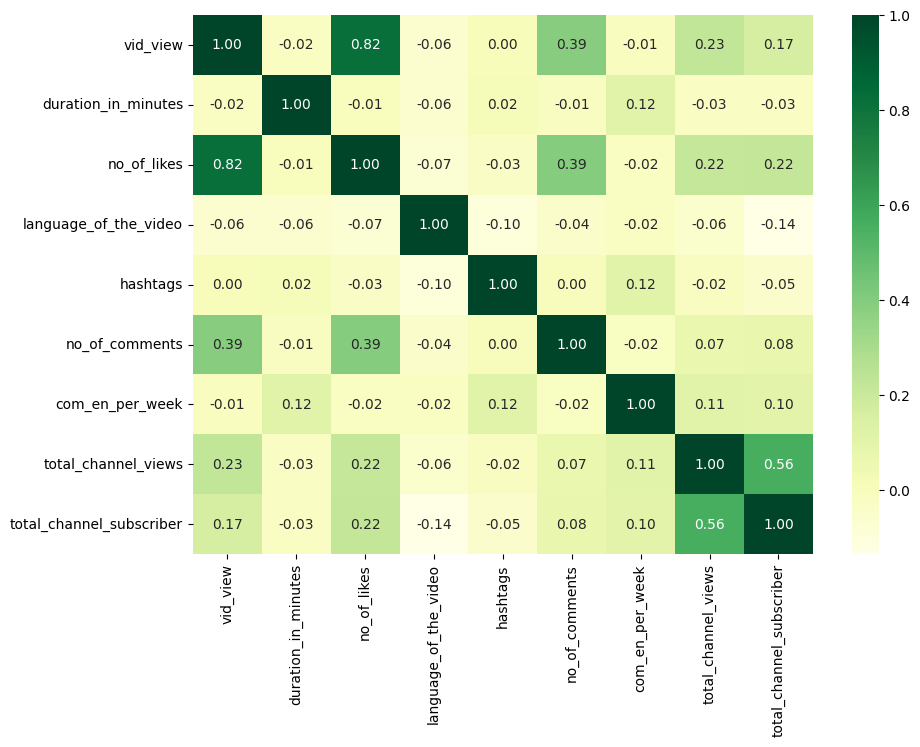

In [111]:
fig, ax = plt.subplots(1, figsize= (10,7), sharey = True)
sns.heatmap(corrMatrix, annot = True, cmap="YlGn", fmt=".2f")

### What we can know

* Video_View and No_of_Likes has strong corrolation

In [112]:
#Observe the relationship between the dependence variable and independence variablee
print("---Here is the variable type---\n", df3.dtypes)
s = df3.apply(lambda x: x.astype("float64"))
s.corrwith(s["no_of_likes"]).sort_values(ascending=False)

---Here is the variable type---
 vid_view                    int64
duration_in_minutes         int64
no_of_likes                 int64
language_of_the_video       int32
hashtags                    int64
no_of_comments              int64
com_en_per_week             int64
total_channel_views         int64
total_channel_subscriber    int32
dtype: object


no_of_likes                 1.000000
vid_view                    0.823746
no_of_comments              0.394895
total_channel_subscriber    0.223231
total_channel_views         0.215962
duration_in_minutes        -0.006129
com_en_per_week            -0.023039
hashtags                   -0.032982
language_of_the_video      -0.070850
dtype: float64

### What we decide 

After exploring the variables, I have decided not to use following variable because they add little or no informative power to the model: hashtags, com_en_per_week, duration_in_minutes, language_of_the_video

#  LightGBM Data Modeling 

In [113]:
! pip install lightgbm

In [118]:
! pip install scikit-learn==1.1.3

                                              0.0/7.5 MB ? eta -:--:--
                                              0.1/7.5 MB 4.1 MB/s eta 0:00:02
     -                                        0.2/7.5 MB 3.0 MB/s eta 0:00:03
     -                                        0.4/7.5 MB 3.3 MB/s eta 0:00:03
     --                                       0.5/7.5 MB 3.3 MB/s eta 0:00:03
     ---                                      0.7/7.5 MB 3.4 MB/s eta 0:00:02
     ----                                     0.9/7.5 MB 3.5 MB/s eta 0:00:02
     -----                                    1.0/7.5 MB 3.3 MB/s eta 0:00:02
     ------                                   1.2/7.5 MB 3.5 MB/s eta 0:00:02
     -------                                  1.4/7.5 MB 3.5 MB/s eta 0:00:02
     --------                                 1.5/7.5 MB 3.5 MB/s eta 0:00:02
     ---------                                1.7/7.5 MB 3.5 MB/s eta 0:00:02
     ---------                                1.8/7.5 MB 3.5 MB/s eta 0

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Lenovo\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



In [119]:
import lightgbm as lgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from pandas import DataFrame
import matplotlib.pyplot as plt

[autoreload of sklearn.utils.fixes failed: Traceback (most recent call last):
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\extensions\autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\extensions\autoreload.py", line 484, in superreload
    update_generic(old_obj, new_obj)
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\extensions\autoreload.py", line 381, in update_generic
    update(a, b)
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\extensions\autoreload.py", line 293, in update_function
    setattr(old, name, getattr(new, name))
ValueError: delayed() requires a code object with 2 free vars, not 1228360646656
]
[autoreload of sklearn.base failed: Traceback (most recent call last):
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Pyt

In [120]:
df3

,vid_view,duration_in_minutes,no_of_likes,language_of_the_video,hashtags,no_of_comments,com_en_per_week,total_channel_views,total_channel_subscriber
0,146059,31,6700,6,0,419,1,7964284,40200
1,231969,14,7800,15,1,189,2,137535681,920000
2,878,8,858,3,0,0,0,72945,458
3,9965,1,188,1,0,77,20,541653219,1680000
4,39780561,8,901000,1,0,28221,1,3600496171,12100000
...,...,...,...,...,...,...,...,...,...
868,6892,14,235,17,0,15,1,129926690,594000
869,16554,7,117,10,2,0,1,129926690,594000
870,32798,6,1,10,3,0,1,5104872,23500
871,1503,5,1,16,3,0,1,5104872,23500


<Axes: xlabel='com_en_per_week', ylabel='no_of_likes'>

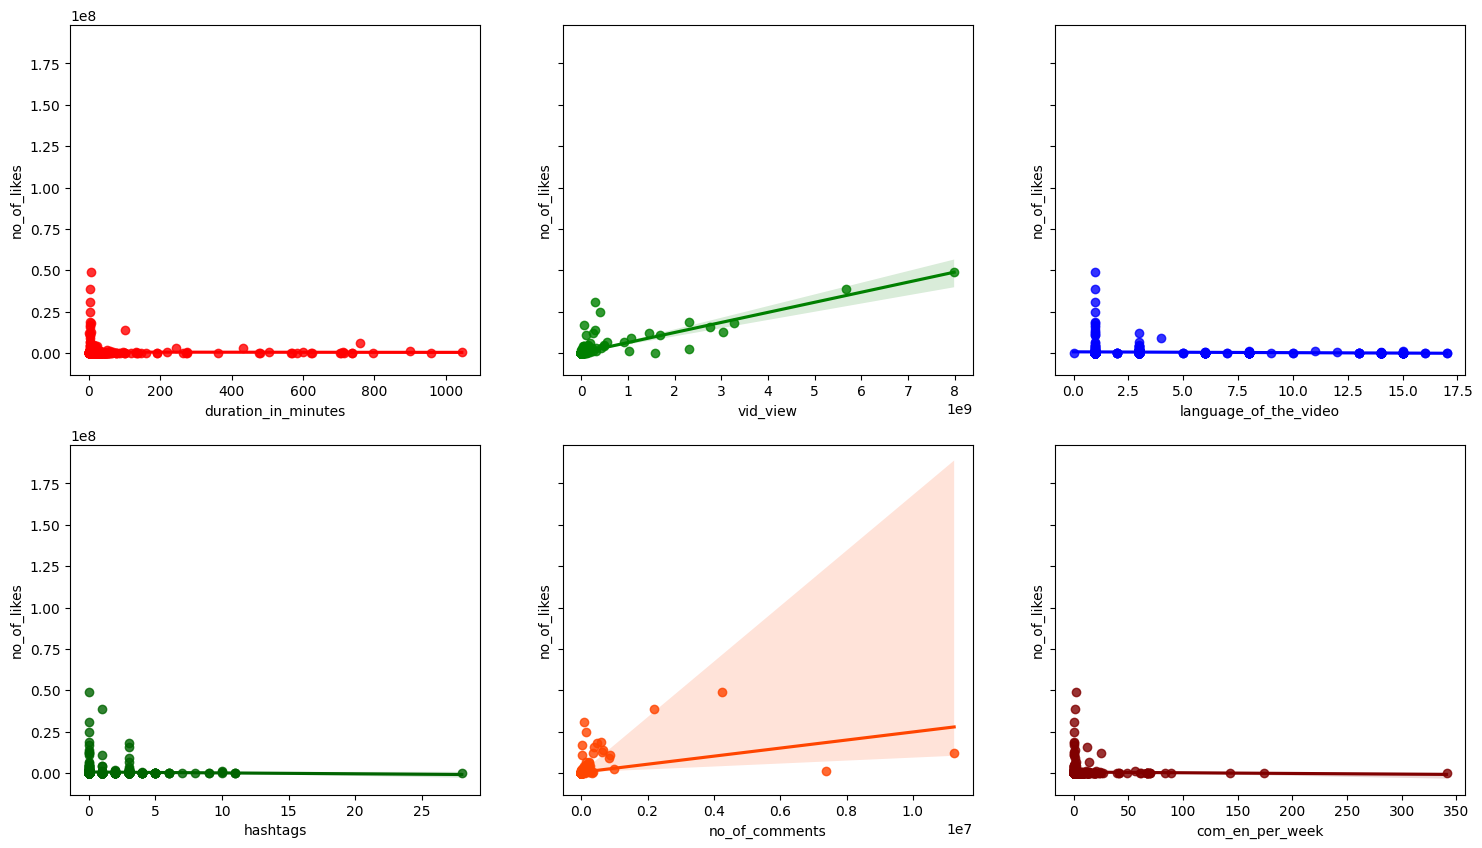

In [121]:
nfig,ax = plt.subplots(2,3, sharey= True, figsize=(18, 10))
sns.regplot(x = 'duration_in_minutes', y =  'no_of_likes' , data = df3, ax = ax[0,0], color = 'red')
sns.regplot(x = 'vid_view', y =  'no_of_likes' , data = df3, ax = ax[0,1],color = 'green')
sns.regplot(x = 'language_of_the_video', y =  'no_of_likes' , data = df3, ax = ax[0,2], color = 'blue')
sns.regplot(x = 'hashtags', y = 'no_of_likes', data = df3, ax = ax[1,0],color = 'darkgreen' )
sns.regplot(x = 'no_of_comments', y =  'no_of_likes' , data = df3, ax = ax[1,1], color = 'orangered')
sns.regplot(x = 'com_en_per_week', y = 'no_of_likes',data = df3, ax = ax[1,2], color = 'maroon')

The graphs are telling that there is no linear relationship between many of the feature variables and the target variable. But we can observe the linear relationship in graphs where the scale of the variable is in the range of the scale of target variable. That means we need to transform the columns to a suitable scale either by standardization, normalization or by applying suitable logarithms on the values.

In [ ]:
#lgb.plot_importance(model, height=.5)

In [122]:
df.drop(['video_link', 'video_title', 'channel_url',
       'creator_name','duration_of_video'], axis = 1, inplace = True)

In [123]:
#converting the datetime values to ordinal values for the linear regression to parse. 
import datetime as dt
df['date_of_video_upload'] = pd.to_datetime(df['date_of_video_upload'])
df['date_of_video_upload'] = df['date_of_video_upload'].map(dt.datetime.toordinal)
df['date_of_the_last_comment'] = pd.to_datetime(df['date_of_the_last_comment'])
df['date_of_the_last_comment'] = df['date_of_the_last_comment'].map(dt.datetime.toordinal)

In [124]:
# Apply the one-hot encoding on nominal categorical variables
df_lr = pd.get_dummies(df)

In [125]:
#converting the datetime values to ordinal values for the linear regression to parse. 
import datetime as dt
df['date_of_video_upload'] = pd.to_datetime(df['date_of_video_upload'])
df['date_of_video_upload'] = df['date_of_video_upload'].map(dt.datetime.toordinal)
df['date_of_the_last_comment'] = pd.to_datetime(df['date_of_the_last_comment'])
df['date_of_the_last_comment'] = df['date_of_the_last_comment'].map(dt.datetime.toordinal)

In [126]:
df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   creator_gender                873 non-null    object
 1   subtitle                      873 non-null    object
 2   video_description             873 non-null    object
 3   maximum_quality_of_the_video  873 non-null    object
 4   premiered_or_not              873 non-null    object
 5   upload_year                   873 non-null    object
 6   upload_month                  873 non-null    object
 7   upload_weekday                873 non-null    object
dtypes: object(8)
memory usage: 54.7+ KB


In [127]:
import statsmodels.api as sm

#Separate the columns into explanatory variables and target variable
features = df_lr.drop('no_of_likes', axis = 1)
features_w_const = sm.add_constant(features)
target  = df_lr.no_of_likes

x_train, x_test, y_train, y_test = train_test_split(features_w_const, target, test_size=0.3, random_state=100)

x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 611 entries, 161 to 520
Data columns (total 71 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   const                               611 non-null    float64
 1   vid_view                            611 non-null    int64  
 2   total_channel_subscriber            611 non-null    int32  
 3   total_channel_views                 611 non-null    int64  
 4   duration_in_seconds                 611 non-null    int32  
 5   date_of_video_upload                611 non-null    int64  
 6   language_of_the_video               611 non-null    int32  
 7   hashtags                            611 non-null    int64  
 8   no_of_comments                      611 non-null    int64  
 9   date_of_the_last_comment            611 non-null    int64  
 10  no_of_videos_the_channel            611 non-null    int64  
 11  no_of_playlist                      611 non-null

In [128]:
features.shape,target.shape

((873, 70), (873,))

In [129]:
from statsmodels.graphics.gofplots import qqplot # Statiscal Models
from statsmodels.stats.stattools import durbin_watson
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Model Evaluation 

In [130]:
# defining parameters 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learning_rate': 0.001,
    'metric': {'l2','l1'},
    'verbose': 1
}

In [131]:
# laoding data
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)

In [133]:
# fitting the model
model = lgb.train(params,
                 num_boost_round = 100000,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 )

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1863
[LightGBM] [Info] Number of data points in the train set: 611, number of used features: 53
[LightGBM] [Info] Start training from score 611232.941080


In [134]:
# prediction
y_pred = model.predict(x_test)

# accuracy check
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(0.5)
rsquared = r2_score(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 
print("R2: %.2f" % rsquared) 

MSE: 5129888731114.69
RMSE: 2264925.77
R2: 0.14


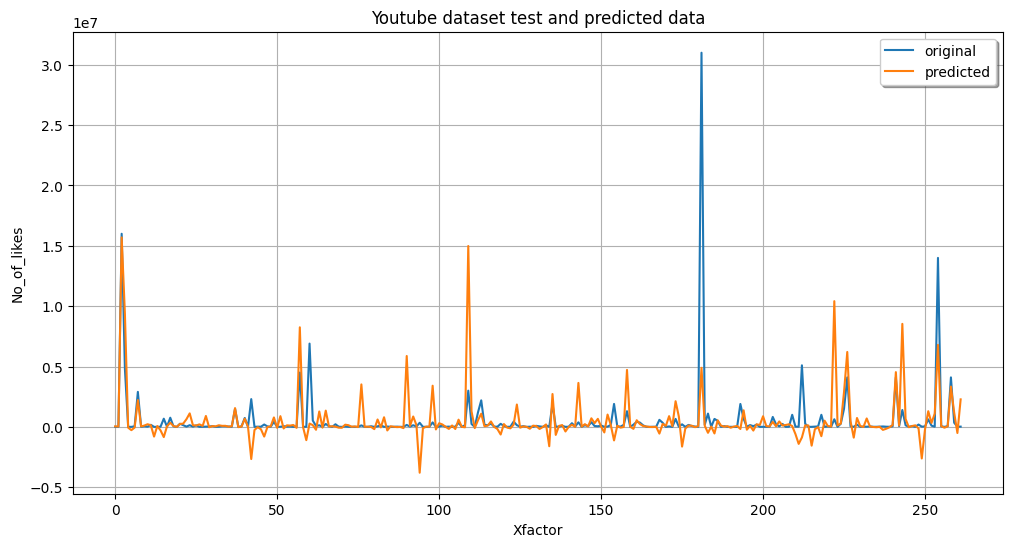

In [135]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Youtube dataset test and predicted data")
plt.xlabel('Xfactor')
plt.ylabel('No_of_likes')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

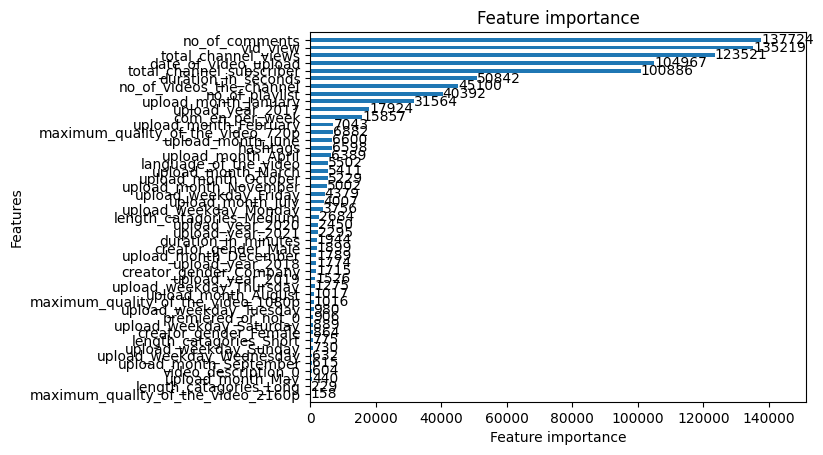

In [136]:
# plotting feature importance
lgb.plot_importance(model, height=.5, grid = False)

In [137]:
residuals = y_test - y_pred

In [138]:
residuals

523   -4.155382e+04
390   -2.384352e+04
636    3.016404e+05
116   -4.566187e+06
188    7.032536e+04
           ...     
565    1.028348e+04
268    7.623236e+05
69    -8.307997e+05
85     5.244812e+05
777   -2.259399e+06
Name: no_of_likes, Length: 262, dtype: float64

In [139]:
score1 = r2_score(y_test, y_pred)
y_train_pred = model.predict(x_train)
score = r2_score(y_train, y_train_pred)
print("-----Result of Accuracy -------")
print("-------------------------------")
print("Testing score  : --->", score1)
print("Training score : --->", score)

-----Result of Accuracy -------
-------------------------------
Testing score  : ---> 0.13931034034336343
Training score : ---> 0.9979673775057734


In [140]:
# import statsmodels.api as sm 
# # x_train_w_const = sm.add_constant(x_train)
# # x_test_w_const = sm.add_constant(x_test)
#model = sm.OLS(y_train, x_train).fit()
# print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [141]:
df.dtypes

vid_view                           int64
creator_gender                    object
total_channel_subscriber           int32
total_channel_views                int64
duration_in_seconds                int32
date_of_video_upload               int64
no_of_likes                        int64
language_of_the_video              int32
subtitle                          object
video_description                 object
hashtags                           int64
no_of_comments                     int64
date_of_the_last_comment           int64
maximum_quality_of_the_video      object
no_of_videos_the_channel           int64
no_of_playlist                     int64
premiered_or_not                  object
com_en_per_week                    int64
duration_in_minutes                int64
upload_year                       object
upload_month                      object
upload_weekday                    object
length_catagories               category
dtype: object

In [ ]:
df.shape

Based on the value between -1 and 1 we can see our linear regression 

In [142]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

print(rmse)

2264925.767241542


In [143]:
#print(x_test)
y_test_pred = model.predict(x_test)
score1 = r2_score(y_test, y_test_pred)
y_train_pred = model.predict(x_train)
score = r2_score(y_train, y_train_pred)
print("-----Result of Accuracy -------")
print("-------------------------------")
print("Testing score  : --->", score1)
print("Training score : --->", score)

-----Result of Accuracy -------
-------------------------------
Testing score  : ---> 0.13931034034336343
Training score : ---> 0.9979673775057734


In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming you have already defined and trained your model

# Perform cross-validation
cv_scores = cross_val_score(lr, x, y, cv=5)  # X and y are your input features and target labels, respectively

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())
print("Standard deviation of CV accuracy:", cv_scores.std())
